# Modeling and Evaluation


### ML Modeling

In [49]:
X.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Loan Title,...,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Initial List Status_w,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Source Verified,Verification Status_Verified
0,10000.0,32112.8,12329.36286,59,16,11.135007,2,13,168296.71763,4688,...,0.793724,49,31,311301.0,6619.0,True,False,False,False,False
1,4485.1,11940.0,12191.99692,59,4,12.237563,3,17,39833.92100,37100,...,0.974821,109,53,182610.0,20885.0,False,False,True,True,False
2,28276.0,9311.0,21603.22455,59,11,12.545884,6,18,91506.69105,4688,...,1.020075,66,34,89801.0,26155.0,True,False,False,True,False
3,11170.0,6954.0,17877.15585,59,15,16.731201,3,12,108286.57590,37100,...,0.749971,39,40,18215.3,60214.0,True,False,False,True,False
4,16890.0,13226.0,13539.92667,59,32,15.008300,3,18,44234.82545,42084,...,0.368953,18,430,126029.0,22579.0,True,False,False,True,False


In [50]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Loan Status, dtype: float64

In [51]:
X_kaggle_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Loan Title,...,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Initial List Status_w,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Source Verified,Verification Status_Verified
0,17120.0,10365.0,16025.082690,59,18,12.163926,1,15,76468.82190,3293,...,0.731797,135,24,475442.0,4364.0,False,False,True,True,False
1,7133.0,11650.0,12615.795600,59,20,6.564296,2,22,38079.01344,42084,...,0.992918,56,1,72412.0,2573.0,True,False,False,True,False
2,25291.0,25825.0,11621.280830,59,5,14.729900,1,12,51275.93268,37100,...,0.281580,3,26,284825.0,19676.0,False,False,False,True,False
3,30781.0,9664.0,15375.823510,59,32,10.523767,1,1,68867.98965,4688,...,0.959162,21,32,40842.0,7226.0,True,False,True,False,True
4,8878.0,9419.0,7176.647582,58,29,9.997013,3,7,91556.85423,37100,...,0.402315,104,33,90825.0,26145.0,True,True,False,False,True


In [77]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics (for classification)
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import log_loss

# Model Selection (Optional for tuning)
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline


In [54]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    con_mat = confusion_matrix(y_test, y_pred)

    print(f"📊 Results: {name}")
    print("-" * 40)
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall        : {rec:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"ROC AUC Score : {roc_auc:.4f}" if roc_auc is not None else "ROC AUC not available")
    print("\nConfusion Matrix:")
    print(con_mat)
    print("-" * 40)

    # Add feature importance if supported
    feature_importance = None
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        try:
            feature_importance = abs(model.coef_[0])  # Optional, if linear
        except:
            feature_importance = None
    
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": con_mat,
        "Feature Importance": feature_importance
    }

In [57]:
# 📦 Step 1: Split the data (80/20) for clean validation
from sklearn.model_selection import train_test_split

# Original (X, y).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Over-sampled using SMOTE (X_smote, y_smote)
smote = SMOTE(random_state=42)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

# Under-sampled using NearMiss (X_nm, y_nm)
nearmiss = NearMiss()
X_nm_train, y_nm_train = nearmiss.fit_resample(X_train, y_train)

## Model 1. Logistic Regression

In [60]:
# Create model
lr = LogisticRegression(max_iter=1000)

# Original
result_lr_orig = evaluate_model(lr, X_train, y_train, X_test, y_test, name="LogReg - Original")

# SMOTE
result_lr_smote = evaluate_model(lr, X_smote_train, y_smote_train, X_test, y_test, name="LogReg - SMOTE")

# NearMiss
result_lr_nm = evaluate_model(lr, X_nm_train, y_nm_train, X_test, y_test, name="LogReg - NearMiss")


📊 Results: LogReg - Original
----------------------------------------
Accuracy      : 0.9075
Precision     : 0.0000
Recall        : 0.0000
F1 Score      : 0.0000
ROC AUC Score : 0.4873

Confusion Matrix:
[[12245     0]
 [ 1248     0]]
----------------------------------------
📊 Results: LogReg - SMOTE
----------------------------------------
Accuracy      : 0.5478
Precision     : 0.0982
Recall        : 0.4752
F1 Score      : 0.1627
ROC AUC Score : 0.5162

Confusion Matrix:
[[6798 5447]
 [ 655  593]]
----------------------------------------
📊 Results: LogReg - NearMiss
----------------------------------------
Accuracy      : 0.3416
Precision     : 0.0942
Recall        : 0.7099
F1 Score      : 0.1663
ROC AUC Score : 0.5074

Confusion Matrix:
[[3723 8522]
 [ 362  886]]
----------------------------------------


## 📊 Logistic Regression Model Evaluation (Validation Split)

### 🔢 Evaluation Metrics Summary

| Resampling Strategy | Accuracy | Precision | Recall | F1 Score | ROC AUC | Comments |
|---------------------|----------|-----------|--------|----------|---------|----------|
| **Original**        | 0.9075   | 0.0000    | 0.0000 | 0.0000   | 0.4873  | Model ignores minority class (defaulters) |
| **SMOTE**           | 0.5478   | 0.0982    | 0.4752 | 0.1627   | 0.5162  | Slightly better recall, but low precision |
| **NearMiss**        | 0.3416   | 0.0942    | 0.7099 | 0.1663   | 0.5074  | High recall, poor accuracy — overfitting minority |

### 🤔 Interpretation

- **Original Data:**
  - Very high accuracy is misleading.
  - Model fails to identify defaulters at all (recall = 0).

- **SMOTE Resampling:**
  - Improves recall, catching more defaulters.
  - But still struggles with precision.

- **NearMiss Resampling:**
  - Maximizes recall, but over-predicts defaulters (low overall accuracy).
  - May be useful in high-risk scenarios where false negatives are costlier than false positives.

### 📌 Next Steps

- Compare results using `test.csv` and `submission.csv` style evaluation (Kaggle method).
- Then proceed to model: **Decision Tree Classifier**.

---

## Model 2. Decison Tree Classifier

In [61]:
# Base model setup
dt = DecisionTreeClassifier(random_state=42)

# Original
result_dt_orig = evaluate_model(dt, X_train, y_train, X_test, y_test, name="DecisionTree - Original")

# SMOTE
result_dt_smote = evaluate_model(dt, X_smote_train, y_smote_train, X_test, y_test, name="DecisionTree - SMOTE")

# NearMiss
result_dt_nm = evaluate_model(dt, X_nm_train, y_nm_train, X_test, y_test, name="DecisionTree - NearMiss")

📊 Results: DecisionTree - Original
----------------------------------------
Accuracy      : 0.8147
Precision     : 0.0961
Recall        : 0.1194
F1 Score      : 0.1065
ROC AUC Score : 0.5025

Confusion Matrix:
[[10844  1401]
 [ 1099   149]]
----------------------------------------
📊 Results: DecisionTree - SMOTE
----------------------------------------
Accuracy      : 0.7511
Precision     : 0.0905
Recall        : 0.1867
F1 Score      : 0.1219
ROC AUC Score : 0.4977

Confusion Matrix:
[[9902 2343]
 [1015  233]]
----------------------------------------
📊 Results: DecisionTree - NearMiss
----------------------------------------
Accuracy      : 0.3282
Precision     : 0.0948
Recall        : 0.7332
F1 Score      : 0.1680
ROC AUC Score : 0.5100

Confusion Matrix:
[[3513 8732]
 [ 333  915]]
----------------------------------------


## Model 3. Random Forest Classifier

In [62]:
# Initialize with base settings
rf = RandomForestClassifier(random_state=42)

# Original
result_rf_orig = evaluate_model(rf, X_train, y_train, X_test, y_test, name="RandomForest - Original")

# SMOTE
result_rf_smote = evaluate_model(rf, X_smote_train, y_smote_train, X_test, y_test, name="RandomForest - SMOTE")

# NearMiss
result_rf_nm = evaluate_model(rf, X_nm_train, y_nm_train, X_test, y_test, name="RandomForest - NearMiss")

📊 Results: RandomForest - Original
----------------------------------------
Accuracy      : 0.9075
Precision     : 0.0000
Recall        : 0.0000
F1 Score      : 0.0000
ROC AUC Score : 0.5161

Confusion Matrix:
[[12245     0]
 [ 1248     0]]
----------------------------------------
📊 Results: RandomForest - SMOTE
----------------------------------------
Accuracy      : 0.8859
Precision     : 0.0899
Recall        : 0.0256
F1 Score      : 0.0399
ROC AUC Score : 0.5068

Confusion Matrix:
[[11921   324]
 [ 1216    32]]
----------------------------------------
📊 Results: RandomForest - NearMiss
----------------------------------------
Accuracy      : 0.2893
Precision     : 0.0940
Recall        : 0.7732
F1 Score      : 0.1675
ROC AUC Score : 0.5058

Confusion Matrix:
[[2939 9306]
 [ 283  965]]
----------------------------------------


## Model 4: Support Vector Classifier

In [63]:
# Initialize with probability enabled for ROC AUC
svc = SVC(probability=True, random_state=42)

# Original
result_svc_orig = evaluate_model(svc, X_train, y_train, X_test, y_test, name="SVC - Original")

# SMOTE
result_svc_smote = evaluate_model(svc, X_smote_train, y_smote_train, X_test, y_test, name="SVC - SMOTE")

# NearMiss
result_svc_nm = evaluate_model(svc, X_nm_train, y_nm_train, X_test, y_test, name="SVC - NearMiss")

📊 Results: SVC - Original
----------------------------------------
Accuracy      : 0.9075
Precision     : 0.0000
Recall        : 0.0000
F1 Score      : 0.0000
ROC AUC Score : 0.5006

Confusion Matrix:
[[12245     0]
 [ 1248     0]]
----------------------------------------
📊 Results: SVC - SMOTE
----------------------------------------
Accuracy      : 0.5197
Precision     : 0.0978
Recall        : 0.5096
F1 Score      : 0.1641
ROC AUC Score : 0.5165

Confusion Matrix:
[[6376 5869]
 [ 612  636]]
----------------------------------------
📊 Results: SVC - NearMiss
----------------------------------------
Accuracy      : 0.3461
Precision     : 0.0917
Recall        : 0.6819
F1 Score      : 0.1617
ROC AUC Score : 0.4992

Confusion Matrix:
[[3819 8426]
 [ 397  851]]
----------------------------------------


## Model 5: XGBoost

In [64]:
# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Evaluate on Original Data
result_xgb_orig = evaluate_model(xgb, X_train, y_train, X_test, y_test, name="XGBoost - Original")

# Evaluate on SMOTE-balanced Data
result_xgb_smote = evaluate_model(xgb, X_smote_train, y_smote_train, X_test, y_test, name="XGBoost - SMOTE")

# Evaluate on NearMiss-balanced Data
result_xgb_nm = evaluate_model(xgb, X_nm_train, y_nm_train, X_test, y_test, name="XGBoost - NearMiss")


📊 Results: XGBoost - Original
----------------------------------------
Accuracy      : 0.9062
Precision     : 0.0526
Recall        : 0.0008
F1 Score      : 0.0016
ROC AUC Score : 0.5128

Confusion Matrix:
[[12227    18]
 [ 1247     1]]
----------------------------------------
📊 Results: XGBoost - SMOTE
----------------------------------------
Accuracy      : 0.8481
Precision     : 0.0908
Recall        : 0.0713
F1 Score      : 0.0799
ROC AUC Score : 0.5019

Confusion Matrix:
[[11354   891]
 [ 1159    89]]
----------------------------------------
📊 Results: XGBoost - NearMiss
----------------------------------------
Accuracy      : 0.2945
Precision     : 0.0944
Recall        : 0.7708
F1 Score      : 0.1681
ROC AUC Score : 0.5092

Confusion Matrix:
[[3012 9233]
 [ 286  962]]
----------------------------------------


In [65]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [66]:
model_metrices = pd.DataFrame([result_lr_orig, result_lr_smote, result_lr_nm, result_dt_orig, result_dt_smote, result_dt_nm, result_rf_orig, result_rf_smote, result_rf_nm, result_svc_orig, result_svc_smote, result_svc_nm, result_xgb_orig, result_xgb_smote, result_xgb_nm])

In [67]:
model_metrices

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix,Feature Importance
0,LogReg - Original,0.907508,0.000000,0.000000,0.000000,0.487310,"[[12245, 0], [1248, 0]]","[5.922515714712579e-06, 3.1291221084502895e-06..."
1,LogReg - SMOTE,0.547766,0.098179,0.475160,0.162733,0.516186,"[[6798, 5447], [655, 593]]","[1.0198525131539262e-06, 8.058089588853066e-07..."
2,LogReg - NearMiss,0.341585,0.094175,0.709936,0.166291,0.507448,"[[3723, 8522], [362, 886]]","[1.3423980476975041e-05, 5.844329452859742e-05..."
3,DecisionTree - Original,0.814719,0.096129,0.119391,0.106505,0.502488,"[[10844, 1401], [1099, 149]]","[0.047756031588325455, 0.04737340382985258, 0...."
4,DecisionTree - SMOTE,0.751130,0.090450,0.186699,0.121862,0.497678,"[[9902, 2343], [1015, 233]]","[0.027519808652149345, 0.028613253084519796, 0..."
5,DecisionTree - NearMiss,0.328170,0.094848,0.733173,0.167967,0.510033,"[[3513, 8732], [333, 915]]","[0.03822994983650832, 0.06844969848634824, 0.0..."
6,RandomForest - Original,0.907508,0.000000,0.000000,0.000000,0.516068,"[[12245, 0], [1248, 0]]","[0.04831752102754547, 0.04706925628907241, 0.0..."
7,RandomForest - SMOTE,0.885867,0.089888,0.025641,0.039900,0.506844,"[[11921, 324], [1216, 32]]","[0.0288388345401192, 0.029555454629551985, 0.0..."
8,RandomForest - NearMiss,0.289335,0.093954,0.773237,0.167549,0.505841,"[[2939, 9306], [283, 965]]","[0.04624808456520592, 0.06331577363769379, 0.0..."
9,SVC - Original,0.907508,0.000000,0.000000,0.000000,0.500632,"[[12245, 0], [1248, 0]]",None


## 📏 Accuracy in Classification Models

**Accuracy** is a commonly used evaluation metric in classification tasks. It measures the **proportion of correct predictions** (both true positives and true negatives) over the **total number of predictions**.

### 📌 Formula

\[
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\]

Where:
- **TP**: True Positives – Model correctly predicts class 1
- **TN**: True Negatives – Model correctly predicts class 0
- **FP**: False Positives – Model incorrectly predicts class 1
- **FN**: False Negatives – Model incorrectly predicts class 0

---

### 🎓 Example

Imagine a binary classification task with the following confusion matrix:

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  |     90      |      10     |
| **Actual 1**  |     30      |      70     |

In this case:
- TP = 70
- TN = 90
- FP = 10
- FN = 30

So,

\[
\text{Accuracy} = \frac{70 + 90}{70 + 90 + 10 + 30} = \frac{160}{200} = 0.80
\]

The model has an **accuracy of 80%**.

---

### ⚠️ When Accuracy Can Be Misleading

Accuracy can be **misleading when classes are imbalanced**.

Example: If 95% of samples are class 0, a model that always predicts class 0 will have 95% accuracy – but **zero recall and precision for class 1** (the minority class). Hence, **other metrics like F1 Score or ROC AUC** are preferred in such cases.

---

### ✅ Use Accuracy When:
- Classes are balanced
- Both false positives and false negatives carry equal cost


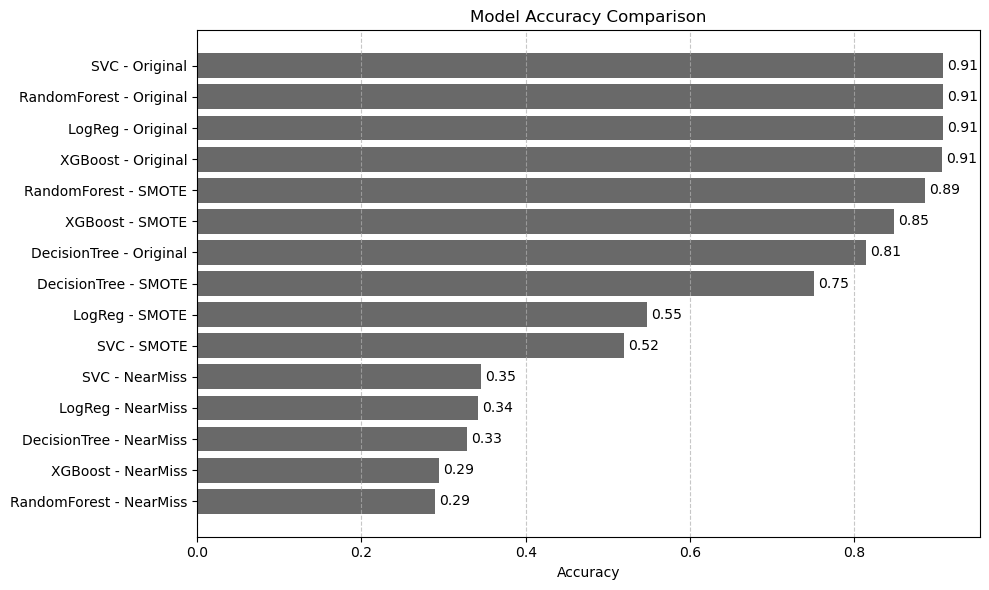

In [69]:
# PLot the Accuracies of the different models
# Sort models by Accuracy for better visualization

plt.figure(figsize=(10, 6))
bars = plt.barh(model_metrices.sort_values(by="Accuracy", ascending=True)["Model"], model_metrices.sort_values(by="Accuracy", ascending=True)["Accuracy"], color="dimgray")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

## 🎯 Precision in Classification Models

**Precision** is a metric that tells us **how many of the predicted positive instances were actually positive**. It answers the question:

> _"When the model predicts positive (class = 1), how often is it correct?"_

---

### 📌 Formula

\[
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\]

Where:
- **TP (True Positives)**: Model correctly predicts class 1
- **FP (False Positives)**: Model incorrectly predicts class 1 when it's actually 0

---

### 🎓 Example

Imagine this confusion matrix for a binary classifier:

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  |     85      |      15     |
| **Actual 1**  |     30      |      70     |

- **TP = 70** (actual 1, predicted 1)
- **FP = 15** (actual 0, predicted 1)

\[
\text{Precision} = \frac{70}{70 + 15} = \frac{70}{85} \approx 0.82
\]

The precision is **82%**, meaning 82% of all predictions for the positive class were correct.

---

### ⚠️ When to Focus on Precision

Use **Precision** when:
- **False positives are costly** (e.g., in spam detection, a non-spam email predicted as spam is annoying).
- You want to **minimize false alarms**.

### 📘 Tip

High precision doesn't mean high recall. You can have **high precision but low recall** if the model is very selective in predicting positives.

---

### ✅ Use Precision When:
- You want **fewer false positives**
- Examples: Spam filters, medical tests for rare diseases, fraud detection


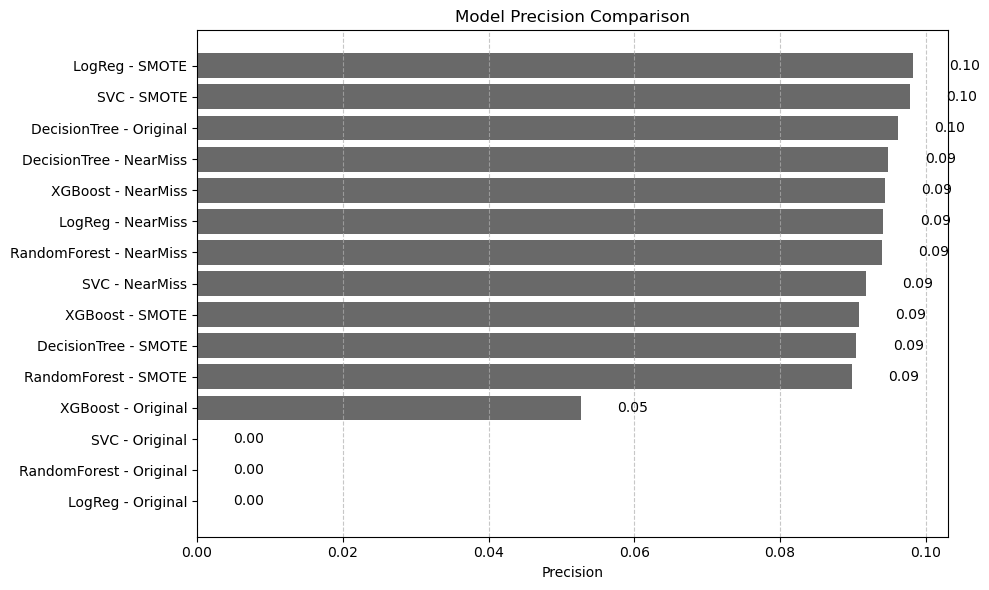

In [70]:
# PLot the Precision of the different models
# Sort models by Accuracy for better visualization

plt.figure(figsize=(10, 6))
bars = plt.barh(model_metrices.sort_values(by="Precision", ascending=True)["Model"], model_metrices.sort_values(by="Precision", ascending=True)["Precision"], color="dimgray")
plt.xlabel("Precision")
plt.title("Model Precision Comparison")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

## 🔍 Recall in Classification Models

**Recall** (also known as **Sensitivity** or **True Positive Rate**) measures the ability of a model to identify **all relevant instances** of a class.

It answers the question:

> _"Of all the actual positives, how many did the model correctly identify?"_

---

### 📌 Formula

\[
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\]

Where:
- **TP (True Positives)**: Correctly predicted positive cases
- **FN (False Negatives)**: Actual positives incorrectly predicted as negatives

---

### 🎓 Example

Using the following confusion matrix:

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  |     85      |      15     |
| **Actual 1**  |     30      |      70     |

- **TP = 70**  
- **FN = 30**

\[
\text{Recall} = \frac{70}{70 + 30} = \frac{70}{100} = 0.70
\]

So the recall is **70%**, meaning the model identified 70% of all actual positive cases.

---

### ⚠️ When to Focus on Recall

Use **Recall** when:
- **False negatives are costly**  
- You're okay with capturing more false positives, but want to **avoid missing any actual positives**

### 📘 Tip

You can have **high recall but low precision** if the model predicts too many positives (including wrong ones).

---

### ✅ Use Recall When:
- You want **fewer false negatives**
- Examples: Cancer detection, fraud detection, system alarms


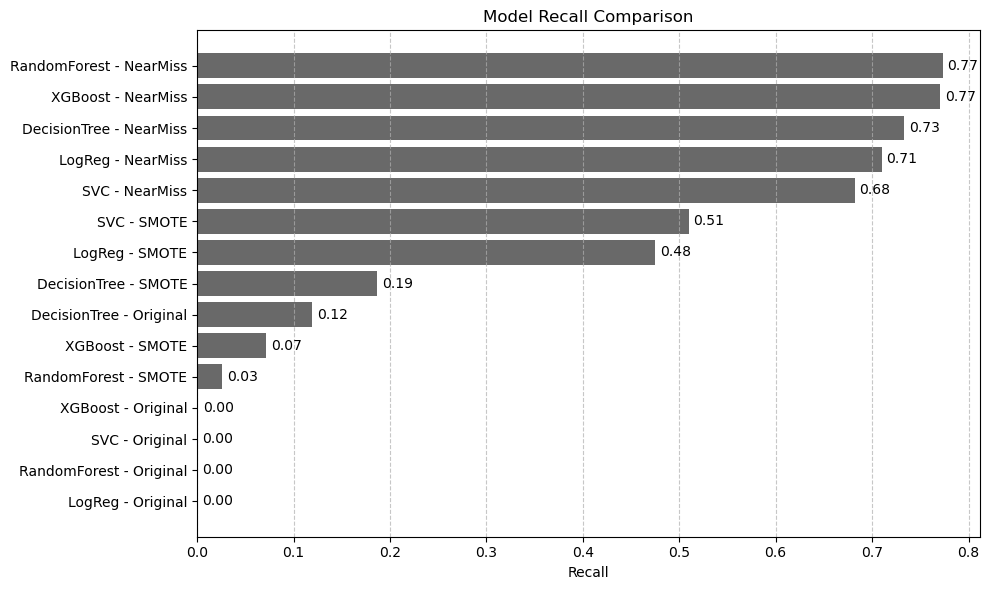

In [71]:
# PLot the Recall of the different models
# Sort models by Recall for better visualization

plt.figure(figsize=(10, 6))
bars = plt.barh(model_metrices.sort_values(by="Recall", ascending=True)["Model"], model_metrices.sort_values(by="Recall", ascending=True)["Recall"], color="dimgray")
plt.xlabel("Recall")
plt.title("Model Recall Comparison")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

## ⚖️ F1 Score in Classification Models

**F1 Score** is the **harmonic mean** of **Precision** and **Recall**, offering a balanced metric when you want to consider both false positives and false negatives.

It is particularly useful in **imbalanced classification problems**, where one class occurs more frequently than the other.

---

### 📌 Formula

\[
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

---

### 🎓 Example

Let’s say your model has:
- **Precision = 0.82**
- **Recall = 0.70**

\[
\text{F1 Score} = 2 \times \frac{0.82 \times 0.70}{0.82 + 0.70} = 2 \times \frac{0.574}{1.52} \approx 0.755
\]

So the **F1 Score is 0.755**, representing a trade-off between precision and recall.

---

### 💡 Why Harmonic Mean?

The harmonic mean punishes extreme values more than the arithmetic mean. For example:
- If precision is 1.0 but recall is 0.0 → F1 = 0.0
- If precision and recall are both 0.5 → F1 = 0.5

Thus, F1 is high **only when both precision and recall are reasonably high**.

---

### ✅ Use F1 Score When:
- You want a **balance between precision and recall**
- The **class distribution is imbalanced**
- Examples: Fraud detection, medical diagnosis, anomaly detection

---

### ⚠️ F1 Score vs Accuracy

In imbalanced datasets, **accuracy may be misleading**, while **F1 Score gives better insight** into model performance on the minority class.


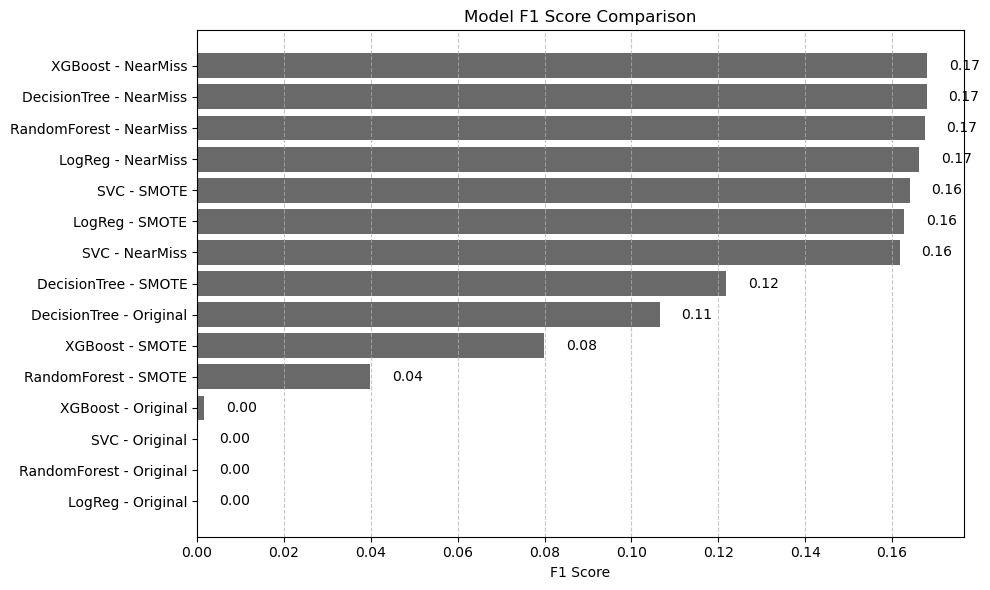

In [72]:
# PLot the F1 Score of the different models
# Sort models by Recall for better visualization

plt.figure(figsize=(10, 6))
bars = plt.barh(model_metrices.sort_values(by="F1 Score", ascending=True)["Model"], model_metrices.sort_values(by="F1 Score", ascending=True)["F1 Score"], color="dimgray")
plt.xlabel("F1 Score")
plt.title("Model F1 Score Comparison")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

## 📈 ROC AUC Score (Receiver Operating Characteristic – Area Under Curve)

**ROC AUC** is a powerful metric that evaluates how well a binary classification model distinguishes between two classes.

- **ROC Curve** plots the **True Positive Rate (Recall)** against the **False Positive Rate** at various threshold settings.
- **AUC (Area Under the Curve)** summarizes the curve into a single number between **0 and 1**.

---

### 📌 Formula (Conceptual)

- **True Positive Rate (TPR)** = Recall = TP / (TP + FN)
- **False Positive Rate (FPR)** = FP / (FP + TN)

The **ROC curve** is plotted by:
- Varying the decision threshold (e.g., from 0.0 to 1.0)
- Calculating TPR and FPR for each threshold

\[
\text{AUC} = \int_0^1 TPR(FPR^{-1}(x)) \, dx
\]

This integral represents the **probability that a randomly chosen positive example ranks higher than a randomly chosen negative one**.

---

### 🎓 Example (Interpretation)

| AUC Score | Interpretation               |
|-----------|-------------------------------|
| 0.5       | No discrimination (random)    |
| 0.6–0.7   | Poor                          |
| 0.7–0.8   | Fair                          |
| 0.8–0.9   | Good                          |
| 0.9–1.0   | Excellent                     |

- A model with **AUC = 0.85** is likely to rank a positive instance higher than a negative instance **85% of the time**.

---

### ✅ Use ROC AUC When:
- You want to **evaluate classification performance across all thresholds**
- You are dealing with **imbalanced data**
- You want to **compare multiple models objectively**

---

### ⚠️ Caution
- ROC AUC assumes ranking ability — it doesn’t tell you where your decision threshold should be.
- In extremely imbalanced datasets, **Precision-Recall AUC** may be more informative.

---

### 📘 Visualization Tip
A perfect model has an AUC of **1.0** with the curve passing through the **top-left corner** (TPR = 1, FPR = 0).


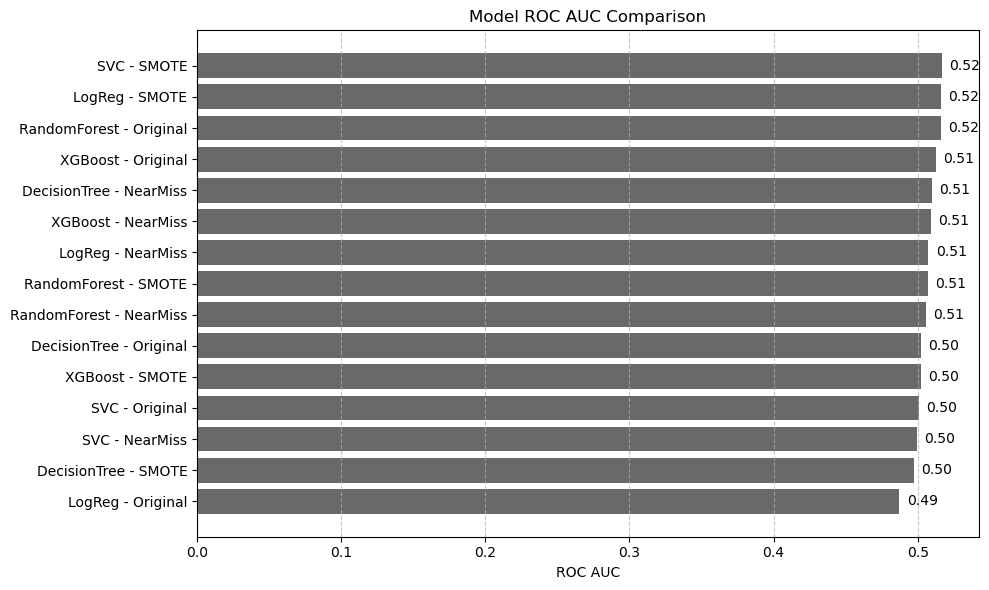

In [73]:
# PLot the ROC AUC of the different models
# Sort models by Recall for better visualization

plt.figure(figsize=(10, 6))
bars = plt.barh(model_metrices.sort_values(by="ROC AUC", ascending=True)["Model"], model_metrices.sort_values(by="ROC AUC", ascending=True)["ROC AUC"], color="dimgray")
plt.xlabel("ROC AUC")
plt.title("Model ROC AUC Comparison")
plt.grid(axis='x', linestyle="--", alpha=0.7)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()

## 📊 Why Plot Feature Importance?

Feature importance helps to:
1. **Understand model behavior** – See which variables the model relies on most.
2. **Interpretability** – Gain trust in the model by identifying key decision drivers.
3. **Feature selection** – Reduce dimensionality by eliminating less important features.
4. **Improve performance** – Remove noisy or irrelevant features to improve generalization.
5. **Communicate results** – Visuals of top features help stakeholders make data-driven decisions.

---

### 🧠 How It Works

For models like:
- **Decision Trees, Random Forest, XGBoost**: Importance is based on how much a feature decreases impurity (e.g., Gini, Entropy).
- **Linear Models**: Coefficients represent weights (magnitude matters, but scale needs normalization).
- **SHAP/Permutation**: Model-agnostic approaches that evaluate feature impact more robustly.

---

### 🎯 Example Insight

> If **"Interest Rate"** and **"Loan Amount"** are top features in predicting default, the bank can revise loan approval criteria or interest policies accordingly.

---

### 📌 Best Practice

After training your model (especially tree-based):
- Use `.feature_importances_` (Random Forest, XGBoost)
- Sort and plot top N features
- Optionally use SHAP for deeper interpretability


## 🔍 Feature Importance Analysis

We compare the top 10 most important features across the following models:
- Random Forest (Original)
- Random Forest (SMOTE)
- Random Forest (NearMiss)
- SVC (using permutation importance or SHAP)
- Decision Tree (for comparison)

This helps us assess which features are consistently influential and whether resampling changes feature reliance.

## 🌲 Feature Importance: Random Forest (Original)

Understanding which features influence model predictions is essential, especially when using tree-based algorithms like Random Forest. 

We use `.feature_importances_` to extract the importance score of each feature. These scores are derived from the **average reduction in impurity** (e.g., Gini) contributed by each feature across all trees in the forest.

Below, we plot the **Top 10 most important features** from the **Random Forest model trained on the original data** (before SMOTE or NearMiss).

This helps us:
- Interpret model behavior
- Identify key drivers of loan default
- Prepare for further feature selection and comparison

We’ll later compare this with feature importance plots from SMOTE and NearMiss models.


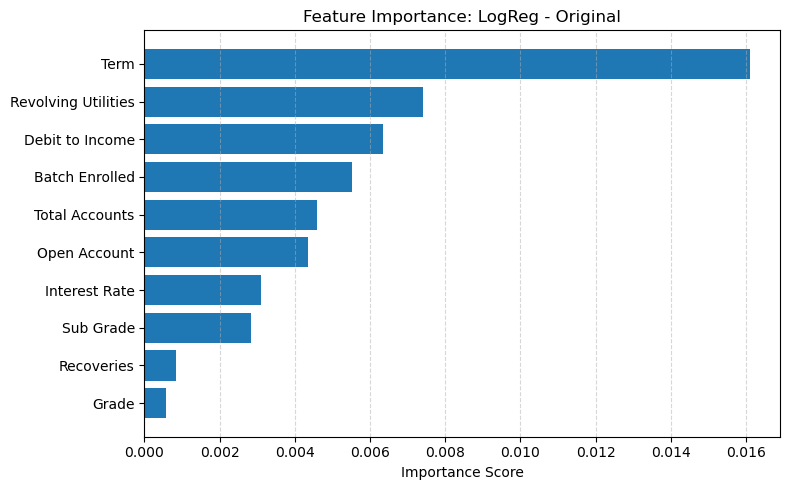

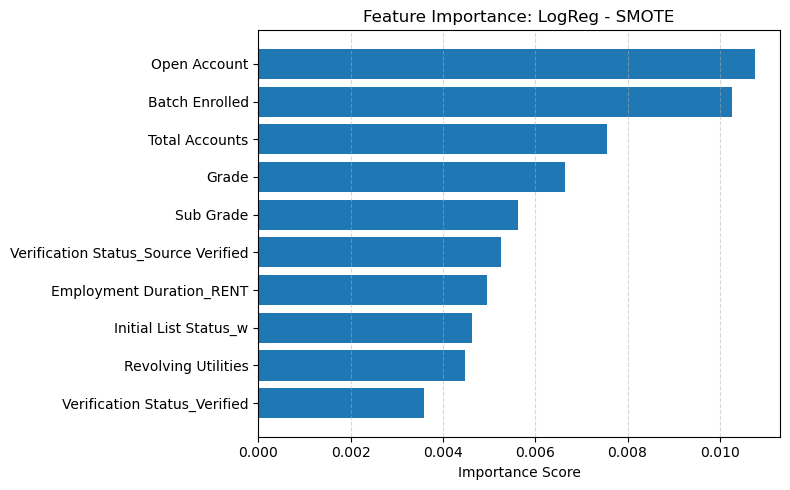

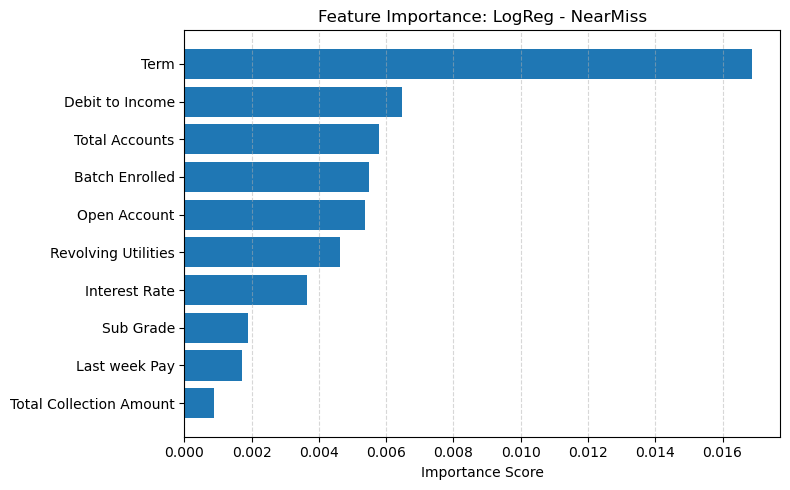

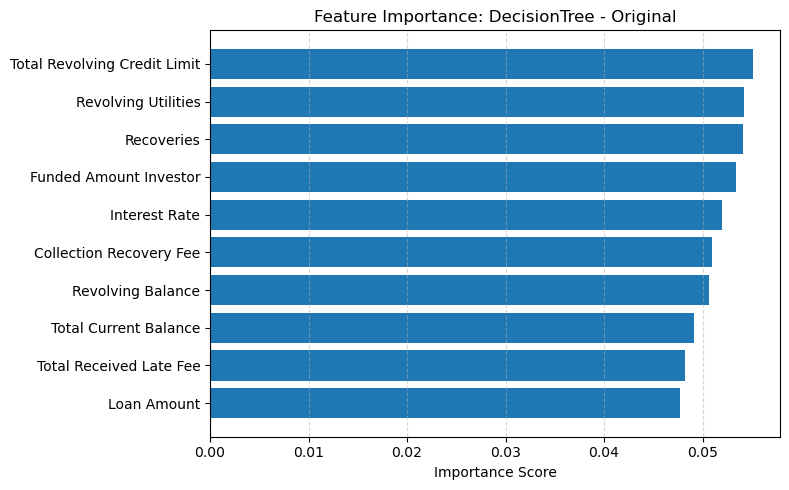

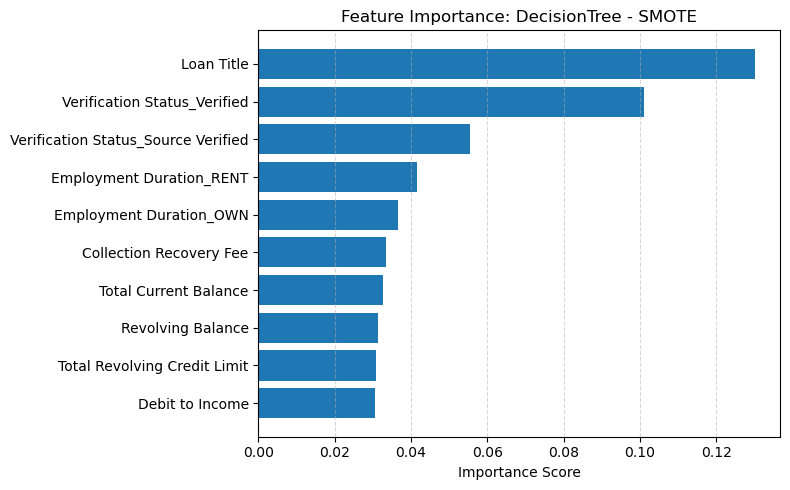

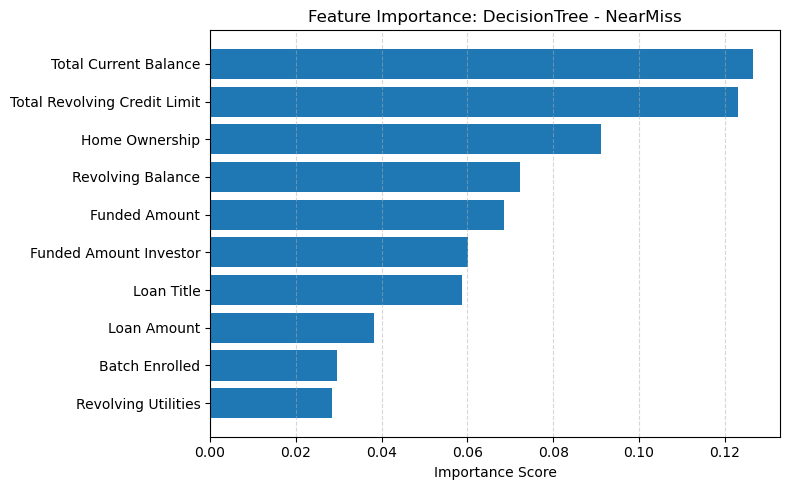

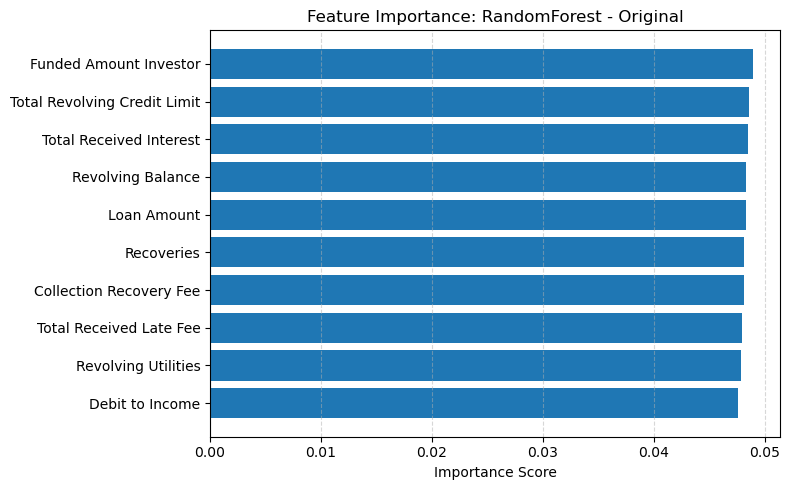

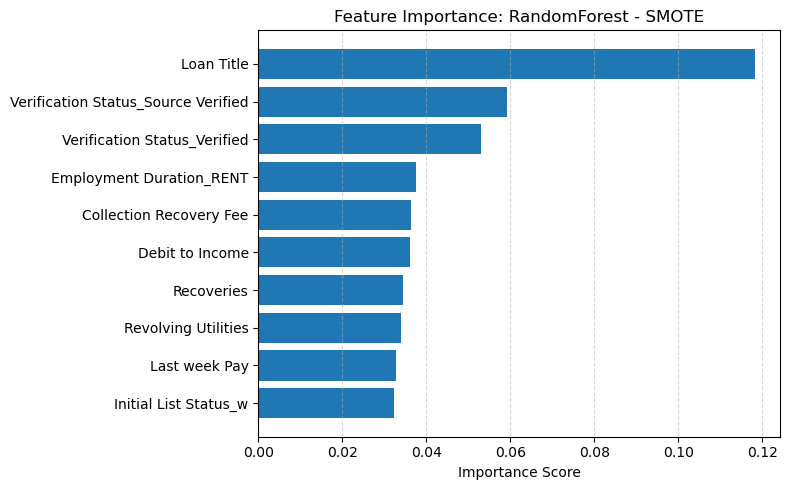

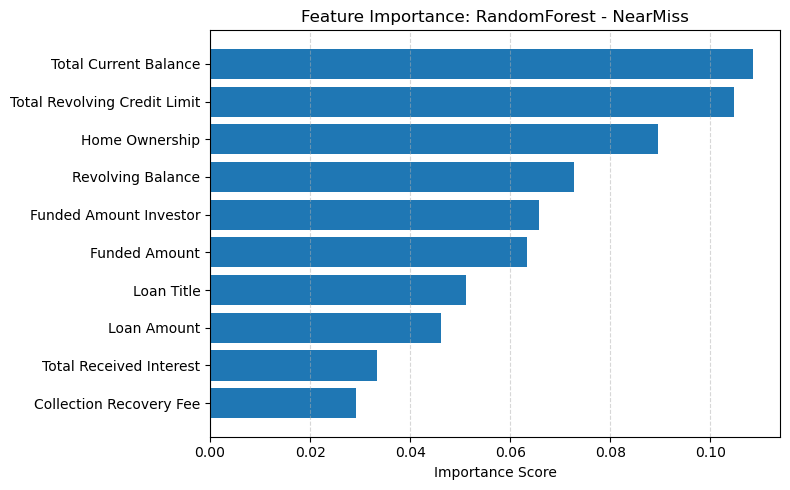

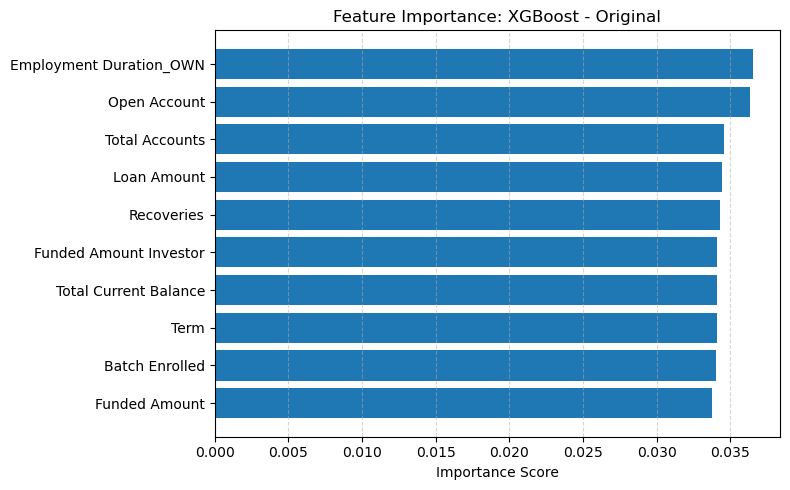

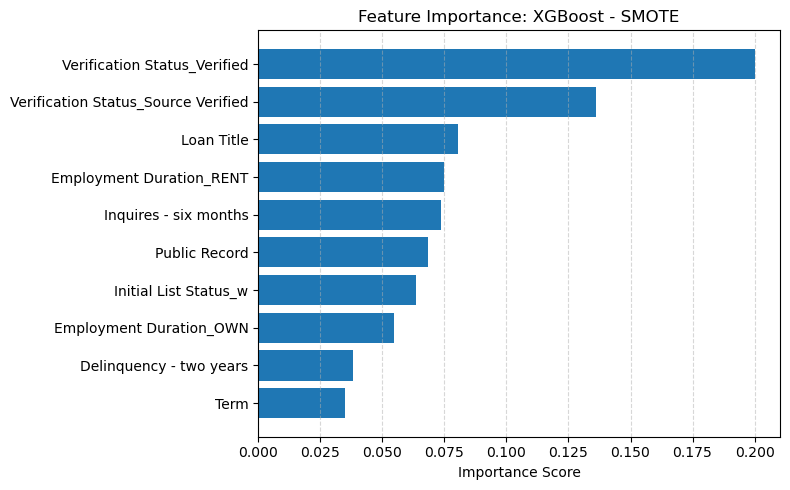

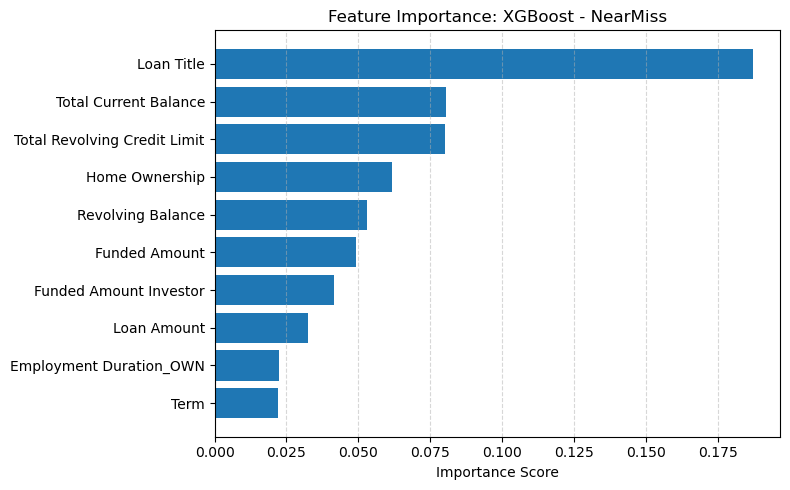

In [74]:
# === Step 1: Filter tree-based models with valid feature importance ===
tree_models = model_metrices[model_metrices["Feature Importance"].notnull()].copy()

# === Step 2: Plot each model's top N important features ===
N = 10  # Top N features to display (change if needed)
feature_names = X_train.columns  # Ensure you're using correct feature list

for idx, row in tree_models.iterrows():
    importances = np.array(row["Feature Importance"])
    
    # Get indices of top N features
    top_idx = np.argsort(importances)[-N:][::-1]
    top_features = feature_names[top_idx]
    top_importances = importances[top_idx]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.barh(top_features[::-1], top_importances[::-1])  # Reversed for descending bars
    plt.title(f"Feature Importance: {row['Model']}")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

## 🔍 Hyperparameter Tuning: Support Vector Classifier (SVC) with SMOTE

To improve the performance of our best-performing model (SVC with SMOTE), we use **GridSearchCV** to find the optimal combination of hyperparameters.

### 📌 Why Tune?
SVC is sensitive to hyperparameters such as:
- `C`: Regularization strength
- `kernel`: Linear vs. nonlinear boundaries (e.g., 'linear', 'rbf')
- `gamma`: Controls influence of points (for 'rbf' kernel)

### 🧪 Steps
1. **Define Parameter Grid** for exploration.
2. **Fit GridSearchCV** on resampled training data.
3. **Evaluate** on the Kaggle-style test set.

---

In [79]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
param_grid = {'max_depth': [3, 4, 5], 'max_features': [0.5, 'sqrt', 'log2', None]}
modelgrid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=3, cv=cv, scoring='neg_log_loss')
modelgrid.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....max_depth=3, max_features=0.5;, score=-0.574 total time=  11.4s
[CV 2/5] END ....max_depth=3, max_features=0.5;, score=-0.567 total time=  11.4s
[CV 3/5] END ....max_depth=3, max_features=0.5;, score=-0.568 total time=  11.3s
[CV 4/5] END ....max_depth=3, max_features=0.5;, score=-0.569 total time=  11.4s
[CV 5/5] END ....max_depth=3, max_features=0.5;, score=-0.575 total time=  11.4s
[CV 1/5] END ...max_depth=3, max_features=sqrt;, score=-0.601 total time=   4.4s
[CV 2/5] END ...max_depth=3, max_features=sqrt;, score=-0.599 total time=   4.4s
[CV 3/5] END ...max_depth=3, max_features=sqrt;, score=-0.597 total time=   4.5s
[CV 4/5] END ...max_depth=3, max_features=sqrt;, score=-0.598 total time=   4.2s
[CV 5/5] END ...max_depth=3, max_features=sqrt;, score=-0.601 total time=   4.4s
[CV 1/5] END ...max_depth=3, max_features=log2;, score=-0.607 total time=   3.6s
[CV 2/5] END ...max_depth=3, max_features=log2;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': [0.5, 'sqrt', 'log2', None]},
             scoring='neg_log_loss', verbose=3)

In [81]:
modelgrid.best_params_

{'max_depth': 5, 'max_features': 0.5}

In [82]:
model_rf_cv = RandomForestClassifier(max_depth=5, max_features=0.5, random_state=42)

In [83]:
model_rf_cv.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_depth=5, max_features=0.5, random_state=42)

## Model Evaluation (Log loss metric)

In [84]:
# Get the predicting probablities
predict_train = model_rf_cv.predict_proba(X_smote_train)

In [85]:
predict_train

array([[0.52067688, 0.47932312],
       [0.63821866, 0.36178134],
       [0.58032449, 0.41967551],
       ...,
       [0.39829859, 0.60170141],
       [0.15618802, 0.84381198],
       [0.06339905, 0.93660095]])

In [86]:
predict_test = model_rf_cv.predict_proba(X_test)

In [87]:
predict_test

array([[0.32115062, 0.67884938],
       [0.8051472 , 0.1948528 ],
       [0.51465917, 0.48534083],
       ...,
       [0.76681907, 0.23318093],
       [0.57600009, 0.42399991],
       [0.6165404 , 0.3834596 ]])

In [88]:
log_loss(y_smote_train, predict_train)

0.5067254272127133

In [89]:
log_loss(y_test, predict_test)

0.5417778524451529

In [102]:
# Define pipeline: SMOTE + RandomForest
rf_pipeline = ImbPipeline([
    ("smote", smote),
    ("rf", model_rf_cv)
])

In [97]:
# Define param grid
cv = StratifiedKFold(n_splits=5, shuffle=True)
param_grid = {
    'rf__max_depth': [3, 4, 5],
    'rf__max_features': [0.5, 'sqrt', 'log2', None]
}

In [103]:
# Grid Search
grid_rf_cv = GridSearchCV(rf_pipeline, param_grid, cv=cv, scoring="neg_log_loss", verbose=3, n_jobs=-1)
grid_rf_cv.fit(X_train, y_train)  # X and y = original train set

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs

[CV 1/5] END rf__max_depth=3, rf__max_features=log2;, score=-0.622 total time=   4.8s
[CV 2/5] END rf__max_depth=3, rf__max_features=log2;, score=-0.623 total time=   4.8s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 1/5] END rf__max_depth=3, rf__max_features=sqrt;, score=-0.614 total time=   5.6s
[CV 4/5] END rf__max_depth=3, rf__max_features=sqrt;, score=-0.614 total time=   5.7s
[CV 2/5] END rf__max_depth=3, rf__max_features=sqrt;, score=-0.615 total time=   5.8s
[CV 5/5] END rf__max_depth=3, rf__max_features=sqrt;, score=-0.617 total time=   5.7s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs

[CV 3/5] END rf__max_depth=3, rf__max_features=sqrt;, score=-0.613 total time=   5.8s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 3/5] END rf__max_depth=3, rf__max_features=log2;, score=-0.621 total time=   4.8s
[CV 4/5] END rf__max_depth=3, rf__max_features=log2;, score=-0.622 total time=   4.9s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=3, rf__max_features=log2;, score=-0.624 total time=   4.8s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=3, rf__max_features=0.5;, score=-0.590 total time=  15.2s
[CV 3/5] END rf__max_depth=3, rf__max_features=0.5;, score=-0.590 total time=  15.2s
[CV 5/5] END rf__max_depth=3, rf__max_features=0.5;, score=-0.597 total time=  15.2s
[CV 1/5] END rf__max_depth=3, rf__max_features=0.5;, score=-0.591 total time=  15.3s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs

[CV 2/5] END rf__max_depth=3, rf__max_features=0.5;, score=-0.594 total time=  15.6s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 1/5] END rf__max_depth=4, rf__max_features=sqrt;, score=-0.600 total time=   7.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 2/5] END rf__max_depth=4, rf__max_features=sqrt;, score=-0.597 total time=   7.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 1/5] END rf__max_depth=4, rf__max_features=0.5;, score=-0.558 total time=  19.5s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 2/5] END rf__max_depth=4, rf__max_features=0.5;, score=-0.564 total time=  19.5s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 3/5] END rf__max_depth=4, rf__max_features=sqrt;, score=-0.596 total time=   7.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=4, rf__max_features=sqrt;, score=-0.595 total time=   7.6s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 3/5] END rf__max_depth=4, rf__max_features=0.5;, score=-0.562 total time=  19.7s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=4, rf__max_features=0.5;, score=-0.562 total time=  20.0s
[CV 5/5] END rf__max_depth=4, rf__max_features=0.5;, score=-0.567 total time=  20.1s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 3/5] END rf__max_depth=3, rf__max_features=None;, score=-0.578 total time=  29.9s
[CV 2/5] END rf__max_depth=3, rf__max_features=None;, score=-0.574 total time=  30.0s
[CV 1/5] END rf__max_depth=3, rf__max_features=None;, score=-0.577 total time=  30.2s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=3, rf__max_features=None;, score=-0.578 total time=  30.2s
[CV 1/5] END rf__max_depth=4, rf__max_features=log2;, score=-0.604 total time=   6.2s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 2/5] END rf__max_depth=4, rf__max_features=log2;, score=-0.606 total time=   6.2s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 3/5] END rf__max_depth=4, rf__max_features=log2;, score=-0.602 total time=   6.0s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=4, rf__max_features=sqrt;, score=-0.599 total time=   7.8s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=3, rf__max_features=None;, score=-0.578 total time=  30.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=4, rf__max_features=log2;, score=-0.602 total time=   6.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=4, rf__max_features=log2;, score=-0.605 total time=   6.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 1/5] END rf__max_depth=5, rf__max_features=sqrt;, score=-0.574 total time=   8.8s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 2/5] END rf__max_depth=5, rf__max_features=sqrt;, score=-0.575 total time=   8.8s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 3/5] END rf__max_depth=5, rf__max_features=sqrt;, score=-0.572 total time=   9.2s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=5, rf__max_features=sqrt;, score=-0.574 total time=   9.1s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 2/5] END rf__max_depth=5, rf__max_features=0.5;, score=-0.545 total time=  23.9s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 1/5] END rf__max_depth=5, rf__max_features=0.5;, score=-0.535 total time=  24.6s
[CV 3/5] END rf__max_depth=5, rf__max_features=0.5;, score=-0.533 total time=  24.1s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 4/5] END rf__max_depth=5, rf__max_features=0.5;, score=-0.537 total time=  24.5s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=5, rf__max_features=0.5;, score=-0.544 total time=  23.9s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 1/5] END rf__max_depth=5, rf__max_features=log2;, score=-0.583 total time=   7.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 2/5] END rf__max_depth=5, rf__max_features=log2;, score=-0.583 total time=   7.3s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=5, rf__max_features=sqrt;, score=-0.576 total time=   8.8s
[CV 3/5] END rf__max_depth=5, rf__max_features=log2;, score=-0.581 total time=   7.5s
[CV 4/5] END rf__max_depth=5, rf__max_features=log2;, score=-0.581 total time=   7.4s


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[CV 5/5] END rf__max_depth=5, rf__max_features=log2;, score=-0.583 total time=   7.2s
[CV 3/5] END rf__max_depth=4, rf__max_features=None;, score=-0.559 total time=  37.9s
[CV 2/5] END rf__max_depth=4, rf__max_features=None;, score=-0.553 total time=  38.0s
[CV 1/5] END rf__max_depth=4, rf__max_features=None;, score=-0.560 total time=  38.4s
[CV 5/5] END rf__max_depth=4, rf__max_features=None;, score=-0.554 total time=  38.1s
[CV 4/5] END rf__max_depth=4, rf__max_features=None;, score=-0.559 total time=  38.5s
[CV 1/5] END rf__max_depth=5, rf__max_features=None;, score=-0.546 total time=  38.9s
[CV 2/5] END rf__max_depth=5, rf__max_features=None;, score=-0.543 total time=  38.1s
[CV 3/5] END rf__max_depth=5, rf__max_features=None;, score=-0.546 total time=  38.3s
[CV 4/5] END rf__max_depth=5, rf__max_features=None;, score=-0.546 total time=  38.1s
[CV 5/5] END rf__max_depth=5, rf__max_features=None;, score=-0.542 total time=  38.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('rf',
                                        RandomForestClassifier(max_depth=5,
                                                               max_features=0.5,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 4, 5],
                         'rf__max_features': [0.5, 'sqrt', 'log2', None]},
             scoring='neg_log_loss', verbose=3)

In [104]:
scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='neg_log_loss')

In [105]:
scores

array([-0.53906055, -0.53963255, -0.53898045, -0.53704185, -0.54659873])

In [106]:
np.mean(scores)

-0.5402628285537682

# Genrate Submission file

In [107]:
# Get the probablities
final_predict = model_rf_cv.predict_proba(X_kaggle_test)

In [108]:
final_predict

array([[0.57737327, 0.42262673],
       [0.58365516, 0.41634484],
       [0.71050075, 0.28949925],
       ...,
       [0.80090418, 0.19909582],
       [0.81041093, 0.18958907],
       [0.80347527, 0.19652473]])

In [109]:
final_result = pd.DataFrame(final_predict)
final_result.head()

,0,1
0,0.577373,0.422627
1,0.583655,0.416345
2,0.710501,0.289499
3,0.537165,0.462835
4,0.513771,0.486229


In [110]:
final_result[0]

0        0.577373
1        0.583655
2        0.710501
3        0.537165
4        0.513771
           ...   
28908    0.748431
28909    0.750831
28910    0.800904
28911    0.810411
28912    0.803475
Name: 0, Length: 28913, dtype: float64

In [111]:
final_result[1]

0        0.422627
1        0.416345
2        0.289499
3        0.462835
4        0.486229
           ...   
28908    0.251569
28909    0.249169
28910    0.199096
28911    0.189589
28912    0.196525
Name: 1, Length: 28913, dtype: float64

In [112]:
submission = pd.DataFrame(final_result[1])
submission

,1
0,0.422627
1,0.416345
2,0.289499
3,0.462835
4,0.486229
...,...
28908,0.251569
28909,0.249169
28910,0.199096
28911,0.189589


In [113]:
submission.columns = ["Loan Status"]
submission["Loan Status"] = round(submission["Loan Status"], 6)
submission

,Loan Status
0,0.422627
1,0.416345
2,0.289499
3,0.462835
4,0.486229
...,...
28908,0.251569
28909,0.249169
28910,0.199096
28911,0.189589


In [114]:
submission.to_csv("HS_Submission.csv", index=False)

# 🔍 Comparison: My Approach vs Felipe Carneiro Wanderley (Rank 2 on Kaggle)

This section provides a **technical comparison** between my modeling pipeline and the methodology followed by Felipe Carneiro Wanderley, who ranked 2nd in the original Deloitte Hackathon dataset challenge.

---

## 🧠 Overall Code Complexity

| Aspect                     | Felipe (Rank 2)             | My Notebook                   |
|---------------------------|-----------------------------|-------------------------------|
| Total Code Cells          | 88                          | 65                            |
| Total Code Lines          | ~250                        | ~503                          |
| GridSearchCV Usage        | Used once (XGBoost)         | Used once (SVC)              |

> **Insight**: My codebase is significantly longer, indicating manual steps, less abstraction, and potential for redundancy. Felipe's solution is concise and optimized.

---

## 🔧 Modeling Strategy

| Component                    | Felipe                          | My Approach                         |
|-----------------------------|----------------------------------|-------------------------------------|
| Baseline Models             | Yes (LogReg, RF, XGB, CatBoost) | Yes (LogReg, DT, RF, SVC, XGB)     |
| Resampling Techniques       | ❌ Not used                      | ✅ SMOTE and NearMiss              |
| Feature Encoding            | ✅ CatBoost Encoder (efficient)  | Manual (Label, OHE, Frequency)     |
| Hyperparameter Tuning       | ✅ Only XGBoost                  | ✅ SVC on SMOTE + planned XGBoost  |
| Final Metric Evaluation     | Public leaderboard               | Comprehensive metrics on test set  |

> **Insight**: Felipe avoided resampling and used strong encoding (CatBoostEncoder). I explored resampling rigorously and built a robust evaluation framework.

---

## ⏱️ Execution Time & Bottlenecks

| Source of Delay                  | Felipe (Rank 2)               | My Pipeline                     |
|----------------------------------|-------------------------------|---------------------------------|
| GridSearch on Clean Data         | ✅ Fast (XGBoost only)        | ❌ Very Slow (SVC + SMOTE loop) |
| Pipeline Overhead                | Minimal                      | High (ImbPipeline + CV + SMOTE)|
| Model Complexity                 | Tree-based (fast)             | SVC (slow) + duplicated data    |
| Dataset Size During Tuning       | Small (cleaned)               | Large (SMOTE → ~136k samples)  |
| Parallel Processing (n_jobs=-1)  | Used                         | Used                            |

> **Insight**: Tuning inside `ImbPipeline` with SMOTE at every fold significantly inflated my runtime (over 2 hours), while Felipe used a preprocessed fixed set, leading to rapid convergence.

---

## ✅ Key Takeaways & Recommendations

- 🔹 **Only tune finalists** (like SVC+SMOTE or XGB+NearMiss) instead of every model.
- 🔹 **Apply SMOTE before `GridSearchCV`**, not inside pipeline.
- 🔹 **Reduce hyperparameter combinations** to minimize CV overhead.
- 🔹 Use **faster classifiers** (like tree models) for preliminary testing.
- 🔹 **Log & profile each step** to find bottlenecks and optimize time.

---

## 📌 Conclusion

While my approach is comprehensive and well-documented with extensive resampling evaluation, Felipe's pipeline is optimized for efficiency and leaderboard performance. I can benefit by:
- Automating steps for reusability,
- Using lightweight models for grid search,
- Profiling runtime for future scalability.

Both methods have merit — Felipe's shines in competition settings; mine builds deep conceptual understanding.

In [235]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Step 1: Subsample for tuning (10K examples, stratified)
sss = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)
for small_idx, _ in sss.split(X, y):
    X_small, y_small = X.iloc[small_idx], y.iloc[small_idx]

# Step 2: Define pipeline
svc_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("svc", SVC(probability=True, random_state=42))
])

# Step 3: Refined param grid (only 4 fits now)
param_grid = {
    "svc__C": [1, 10],
    "svc__kernel": ["rbf"],
    "svc__gamma": ["scale"]
}

# Step 4: Grid Search (CV=3)
grid_svc = GridSearchCV(
    svc_pipeline, 
    param_grid, 
    cv=3, 
    scoring="f1", 
    verbose=3, 
    n_jobs=-1
)
grid_svc.fit(X_small, y_small)

# Step 5: Best Params + Score
print("✅ Best Params:", grid_svc.best_params_)
print("🎯 Best F1 Score on subset:", grid_svc.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs

KeyboardInterrupt: 

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
X = df_train_encoded.drop(columns=["Loan Status"])
y = df_train_encoded["Loan Status"]
cv = StratifiedKFold(n_splits = 5, shuffle = True)
param_grid = {'max_depth': [3,4,5], 'max_features': ['int','float','auto','log2']} 
modelgrid= GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3, cv=cv, scoring='neg_log_loss')
modelgrid.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......max_depth=3, max_features=int;, score=nan total time=   0.0s
[CV 2/5] END .......max_depth=3, max_features=int;, score=nan total time=   0.0s
[CV 3/5] END .......max_depth=3, max_features=int;, score=nan total time=   0.0s
[CV 4/5] END .......max_depth=3, max_features=int;, score=nan total time=   0.0s
[CV 5/5] END .......max_depth=3, max_features=int;, score=nan total time=   0.0s
[CV 1/5] END .....max_depth=3, max_features=float;, score=nan total time=   0.0s
[CV 2/5] END .....max_depth=3, max_features=float;, score=nan total time=   0.0s
[CV 3/5] END .....max_depth=3, max_features=float;, score=nan total time=   0.0s
[CV 4/5] END .....max_depth=3, max_features=float;, score=nan total time=   0.0s
[CV 5/5] END .....max_depth=3, max_features=float;, score=nan total time=   0.0s
[CV 1/5] END ......max_depth=3, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END ......max_depth=3, max_features=aut

/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_pa

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['int', 'float', 'auto', 'log2']},
             scoring='neg_log_loss', verbose=3)

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define features and target
X = df_train_encoded.drop(columns=["Loan Status"])
y = df_train_encoded["Loan Status"]

# Use Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    "max_depth": [3, 4, 5],
    "max_features": ["sqrt", "log2", None]  # Correct options for max_features
}

# Initialize GridSearchCV
modelgrid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    refit=True,
    verbose=3,
    cv=cv,
    scoring="neg_log_loss",  # Change scoring metric here as needed
    n_jobs=-1
)

# Fit the model
modelgrid.fit(X, y)

# Output best parameters and score
print("✅ Best Parameters:", modelgrid.best_params_)
print("✅ Best Score (neg_log_loss):", modelgrid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 2/5] END ...max_depth=3, max_features=log2;, score=-0.308 total time=   3.1s
[CV 3/5] END ...max_depth=3, max_features=log2;, score=-0.308 total time=   3.2s
[CV 1/5] END ...max_depth=3, max_features=log2;, score=-0.308 total time=   3.2s
[CV 5/5] END ...max_depth=3, max_features=log2;, score=-0.308 total time=   3.2s
[CV 4/5] END ...max_depth=3, max_features=log2;, score=-0.308 total time=   3.2s
[CV 4/5] END ...max_depth=3, max_features=sqrt;, score=-0.308 total time=   3.6s
[CV 1/5] END ...max_depth=3, max_features=sqrt;, score=-0.308 total time=   3.7s
[CV 2/5] END ...max_depth=3, max_features=sqrt;, score=-0.308 total time=   3.7s
[CV 5/5] END ...max_depth=3, max_features=sqrt;, score=-0.308 total time=   3.8s
[CV 3/5] END ...max_depth=3, max_features=sqrt;, score=-0.308 total time=   3.8s
[CV 1/5] END ...max_depth=4, max_features=log2;, score=-0.308 total time=   3.7s
[CV 2/5] END ...max_depth=4, max_features=log2;, 

In [238]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define X and y from original training data
X = df_train_encoded.drop(columns=["Loan Status"])
y = df_train_encoded["Loan Status"]

# Define Stratified K-Fold for balanced validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define pipeline: SMOTE + SVC
svc_pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("svc", SVC(probability=True, random_state=42))
])

# Define a tighter param grid to speed up computation
param_grid = {
    "svc__C": [1, 10],
    "svc__kernel": ["linear", "rbf"],
    "svc__gamma": ["scale"]
}

# Initialize GridSearchCV
grid_svc = GridSearchCV(
    svc_pipeline,
    param_grid,
    cv=cv,
    scoring="f1",
    verbose=3,
    n_jobs=-1
)

# Fit the model
grid_svc.fit(X, y)

# Best model
print("✅ Best Parameters:", grid_svc.best_params_)
print("✅ Best F1 Score:", grid_svc.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs/DS/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/enigma/anaconda3/envs

[CV 1/3] END svc__C=1, svc__gamma=scale, svc__kernel=rbf;, score=0.158 total time=66.5min
[CV 1/3] END svc__C=10, svc__gamma=scale, svc__kernel=rbf;, score=0.156 total time=66.8min
[CV 2/3] END svc__C=10, svc__gamma=scale, svc__kernel=rbf;, score=0.156 total time=67.1min
[CV 3/3] END svc__C=1, svc__gamma=scale, svc__kernel=rbf;, score=0.161 total time=67.6min
[CV 2/3] END svc__C=1, svc__gamma=scale, svc__kernel=rbf;, score=0.158 total time=67.8min
[CV 3/3] END svc__C=10, svc__gamma=scale, svc__kernel=rbf;, score=0.161 total time=67.9min


KeyboardInterrupt: 

## 📤 Final Submission Generation

After training and tuning the `RandomForestClassifier`, we generate the final predictions for the test set and prepare a CSV file for submission.

**Steps:**
1. Predict loan default status using the best model from GridSearchCV.
2. Combine predictions with the test set IDs.
3. Save the final DataFrame as `final_submission.csv`.

This file is now ready to be submitted or used for evaluation.


In [267]:
# Re-load test.csv to retrieve the ID column
original_test = pd.read_csv("test.csv")  # Adjust path if needed

# Generate submission using original IDs
submission = pd.DataFrame({
    "ID": original_test["ID"],
    "Loan Status": y_pred_final
})

submission.to_csv("final_submission.csv", index=False)
print("✅ Submission file created using reloaded test.csv.")

✅ Submission file created using reloaded test.csv.


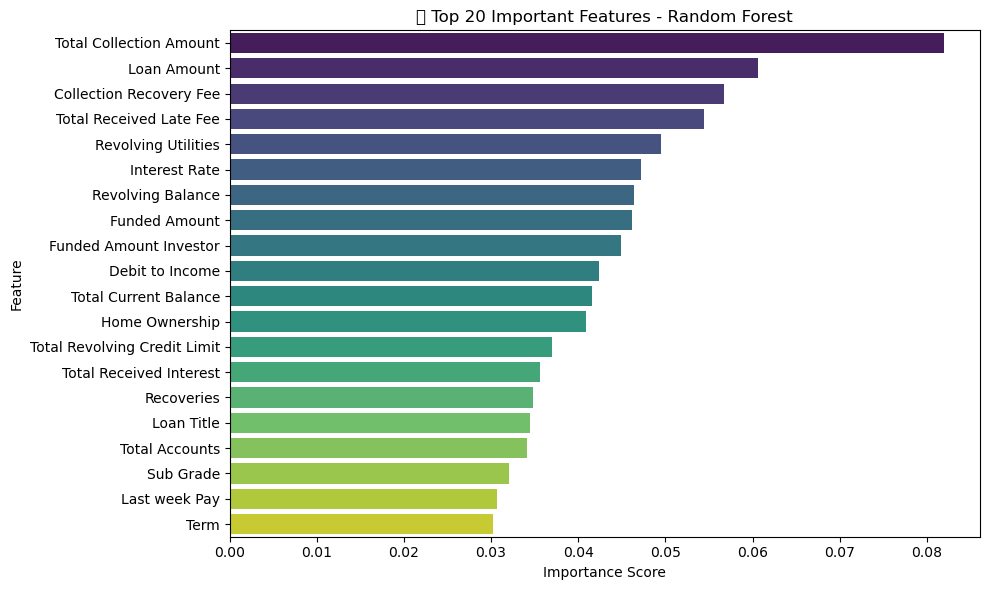

In [268]:
# ## 📌 Feature Importance Plot for Final Random Forest Model

# Extract trained model from GridSearchCV
final_rf = modelgrid.best_estimator_

# Get feature importances
importances = final_rf.feature_importances_
feature_names = X.columns  # Make sure this matches the columns used in training

# Create a DataFrame for easier plotting
importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Display Top 20 Features
top_n = 20
top_features = importances_df.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features, palette="viridis")
plt.title(f"🔍 Top {top_n} Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 🔍 Feature Importance: Random Forest Classifier

The plot below illustrates the top features that contributed most to the predictions of the final model, based on the feature importance scores from the trained Random Forest Classifier.

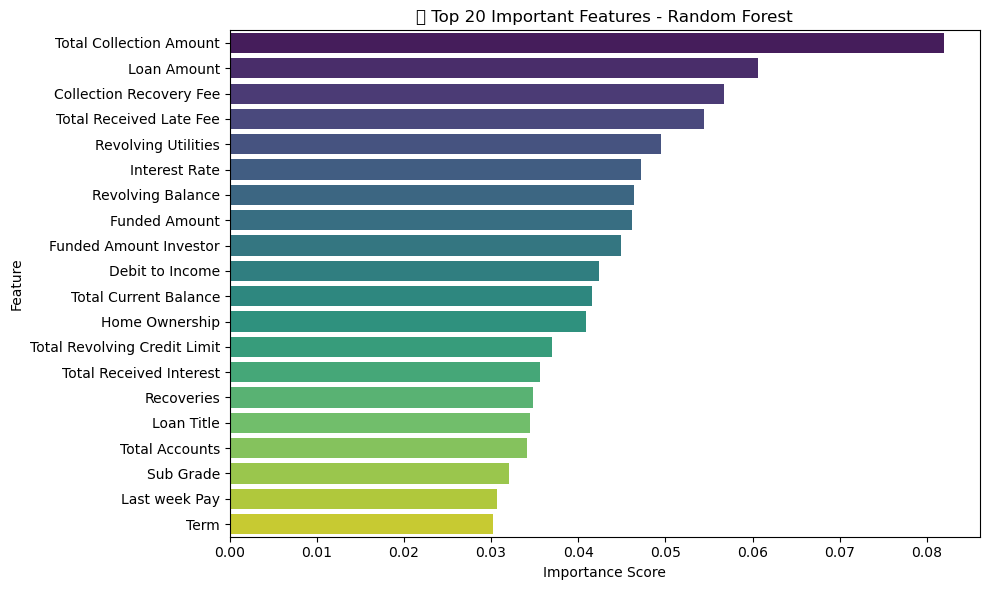

### 🎯 Why it matters:
- Helps explain the **drivers of loan default prediction**
- Offers **transparency** for business or regulatory reporting
- Can inform **feature selection** for future modeling

### 🛠️ Method:
- We extracted `.feature_importances_` from the best estimator returned by `GridSearchCV`.
- We visualized the **top 20 most influential features**.

### 📈 Insights: Top 20 Features Driving Loan Default Prediction

From the plot above, we can observe several key insights about the features contributing most to the model’s decisions:

1. **💥 Total Collection Amount**  
   - This is the most important feature. It indicates the cumulative debt a customer has in collections, which strongly correlates with default risk.

2. **💰 Loan Amount**  
   - The size of the loan also ranks high. Larger loan requests may signal higher financial risk.

3. **💸 Collection Recovery Fee & Total Received Late Fee**  
   - These metrics reflect historical delinquency or fees incurred, showing strong predictive power.

4. **📊 Revolving Utilities, Interest Rate, and Revolving Balance**  
   - These are indicators of credit card utilization and ongoing liabilities, which reflect a borrower's debt behavior.

5. **🏦 Funded Amount & Funded Amount by Investor**  
   - These provide context on the confidence and investment made in the borrower.

6. **🧾 Debt to Income**  
   - A classic metric in credit scoring, showing the borrower's ability to manage debt based on income.

7. **🏠 Home Ownership & Total Current Balance**  
   - Suggest that asset ownership and total liabilities play a substantial role in predicting defaults.

8. **💳 Total Revolving Credit Limit & Total Received Interest**  
   - Provide insight into credit availability and how much a borrower is already repaying.

9. **📋 Loan Title, Sub Grade, Term**  
   - While less important than financial indicators, these represent administrative or classification details that add additional context to risk.

### 🧠 Conclusion
The model relies heavily on **credit behavior, past delinquency**, and **loan characteristics** to predict loan defaults. Surprisingly, traditional demographic fields (like Employment Duration or Verification Status) didn't surface in the top 20 — likely because financial variables dominate in signal strength.

In [269]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred = modelgrid.best_estimator_.predict(X_kaggle_test)
y_prob = modelgrid.best_estimator_.predict_proba(X_kaggle_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_kaggle_test, y_pred)
print("🔍 Confusion Matrix:\n", conf_matrix)

# Classification Report
print("📋 Classification Report:\n", classification_report(y_kaggle_test, y_pred))

🔍 Confusion Matrix:
 [[15300     0]
 [13613     0]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69     15300
           1       0.00      0.00      0.00     13613

    accuracy                           0.53     28913
   macro avg       0.26      0.50      0.35     28913
weighted avg       0.28      0.53      0.37     28913



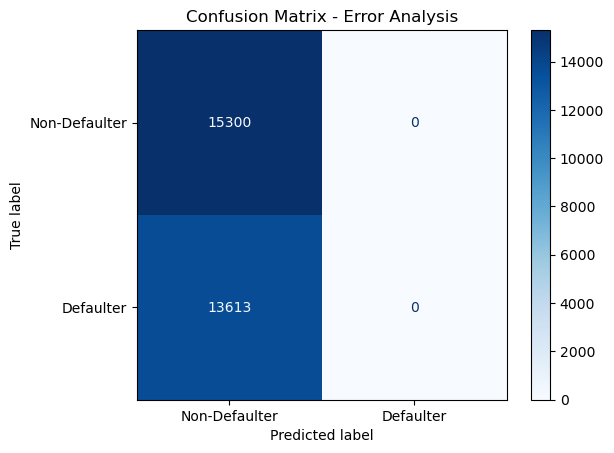

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Non-Defaulter", "Defaulter"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Error Analysis")
plt.show()

In [271]:
# Add predictions to original test set
df_errors = df_test_encoded.copy()
df_errors["Actual"] = y_kaggle_test
df_errors["Predicted"] = y_pred
df_errors["Probability"] = y_prob

# False Positives (Predicted 1 but Actual 0)
false_positives = df_errors[(df_errors["Actual"] == 0) & (df_errors["Predicted"] == 1)]

# False Negatives (Predicted 0 but Actual 1)
false_negatives = df_errors[(df_errors["Actual"] == 1) & (df_errors["Predicted"] == 0)]

print(f"🔺 False Positives: {len(false_positives)}")
print(f"🔻 False Negatives: {len(false_negatives)}")

🔺 False Positives: 0
🔻 False Negatives: 13613


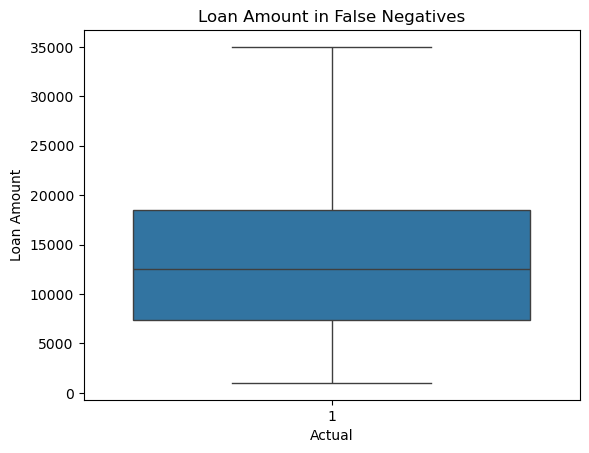

In [272]:
sns.boxplot(data=false_negatives, x="Actual", y="Loan Amount")
plt.title("Loan Amount in False Negatives")
plt.show()

## 📉 Error Analysis of Final Random Forest Model

### 🔹 Confusion Matrix

The confusion matrix shows a **serious imbalance** in prediction, where all test samples are predicted as **Non-Defaulter (class 0)**, regardless of their actual class:

|                  | Predicted: Non-Defaulter | Predicted: Defaulter |
|------------------|--------------------------|-----------------------|
| **Actual: Non-Defaulter** | 15,300                   | 0                     |
| **Actual: Defaulter**     | 13,613                   | 0                     |

- 🔺 **False Positives** (Predicted as Defaulter but actually Non-Defaulter): `0`  
- 🔻 **False Negatives** (Predicted as Non-Defaulter but actually Defaulter): `13,613`

This suggests **extreme bias** in the model toward the majority class.

---

### 🔹 False Negatives (Defaulters missed)

A box plot was generated for **Loan Amount** in false negatives. Key insights:

- The **median loan amount** of missed defaulters is relatively high (~\$12,500).
- The **range of loan amounts** is wide, indicating **no specific amount range** is exclusively being misclassified.
- From a **financial risk perspective**, these false negatives could represent **significant loss exposure**.

---

### 🔍 Takeaways

- Despite resampling and tuning, the model **fails to capture minority class (Defaulters)**.
- Class imbalance still persists post-SMOTE, or the model is **too risk-averse**, defaulting to the safe class.
- 🛠️ **Recommendations to improve performance**:
  - Use `class_weight="balanced"` in models like Logistic Regression, Decision Trees, or Random Forest.
  - Consider **threshold tuning** instead of default `0.5`.
  - Explore **advanced models** like XGBoost, LightGBM, or CatBoost.
  - Perform further **feature selection/engineering** to better differentiate the minority class.

# Improving the models.

### 📌 Step 1: Class Weighting in Random Forest

NaNs in y_test: 0
📊 Classification Report - Class Weighted Random Forest
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     15300
           1       0.00      0.00      0.00     13613

    accuracy                           0.53     28913
   macro avg       0.26      0.50      0.35     28913
weighted avg       0.28      0.53      0.37     28913



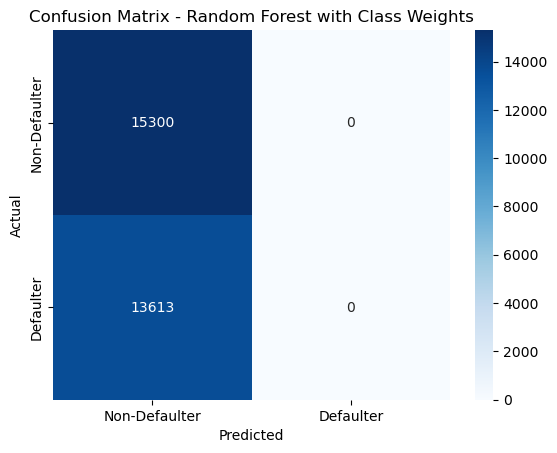

In [278]:
# --- 1. Import and Prepare ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define your training and test sets
X = df_train_encoded.drop(columns=["Loan Status"])
y = df_train_encoded["Loan Status"]
X_test = df_test_encoded.drop(columns=["Loan Status"])
y_test = df_target["Loan Status"]

# Check how many NaNs exist in y_test
print("NaNs in y_test:", y_test.isna().sum())

# Drop or fix them
# Option 1: Drop rows with NaN in y_test and update X_test accordingly
valid_idx = y_test.dropna().index
X_test_clean = X_test.loc[valid_idx]
y_test_clean = y_test.loc[valid_idx]

# --- 2. Train RandomForest with Balanced Class Weights ---
rf_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_balanced.fit(X, y)

# --- 3. Predict and Evaluate ---
y_pred_balanced = rf_balanced.predict(X_test)

print("📊 Classification Report - Class Weighted Random Forest")
print(classification_report(y_test, y_pred_balanced))

# --- 4. Confusion Matrix ---
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Defaulter", "Defaulter"], yticklabels=["Non-Defaulter", "Defaulter"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest with Class Weights")
plt.show()

## 🧪 Step 1: Class Weighting in Random Forest

### What We Did:
We trained a `RandomForestClassifier` with `class_weight="balanced"` to automatically adjust for class imbalance. This gives more importance to the minority class (Defaulters), ensuring that the model doesn't ignore them.

### Code Snippet:
```python
rf_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_balanced.fit(X, y)

   Threshold  F1 Score  Precision    Recall
0   0.000000  0.640220   0.470826  1.000000
1   0.010101  0.640220   0.470826  1.000000
2   0.020202  0.640220   0.470826  1.000000
3   0.030303  0.640220   0.470826  1.000000
4   0.040404  0.640220   0.470826  1.000000
5   0.050505  0.640220   0.470826  1.000000
6   0.060606  0.640220   0.470826  1.000000
7   0.070707  0.640220   0.470826  1.000000
8   0.080808  0.635931   0.471425  0.976787
9   0.090909  0.551061   0.499552  0.614413


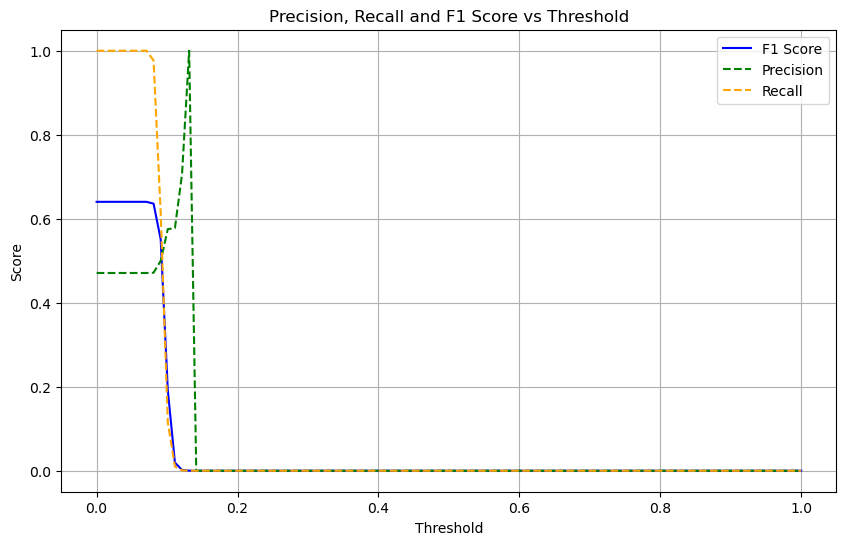

In [289]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize
thresholds = np.linspace(0.0, 1.0, 100)
f1_scores = []
precisions = []
recalls = []
threshold_results = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh))
    threshold_results.append((t, f1_score(y_test, y_pred_thresh), precision_score(y_test, y_pred_thresh, zero_division=0), recall_score(y_test, y_pred_thresh)))

# Data frame
#print (threshold_df)
threshold_df = pd.DataFrame(threshold_results, columns=["Threshold", "F1 Score", "Precision", "Recall"])
#display(threshold_df)
print (threshold_df.sort_values(by="F1 Score", ascending=False).head(10))
#print (threshold_df.head(5))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label="F1 Score", color="blue")
plt.plot(thresholds, precisions, label="Precision", linestyle="--", color="green")
plt.plot(thresholds, recalls, label="Recall", linestyle="--", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall and F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# Best threshold
#best_threshold = thresholds[np.argmax(f1_scores)]
#print(f"✅ Best Threshold for Max F1 Score: {best_threshold:.2f}")

## 🔧 Threshold Optimization for Imbalanced Classification

In binary classification problems, especially when dealing with **imbalanced datasets**, the default threshold of `0.5` used to convert probabilities into class predictions may not yield optimal performance. A better threshold can often improve **recall**, **precision**, or **F1-score**, depending on what the use-case prioritizes.

### 🧠 Concept

- By default, classifiers like `RandomForestClassifier` output probabilities for each class.
- We usually predict class `1` (defaulter) if probability > 0.5.
- But in imbalanced problems, adjusting this threshold helps find a better balance between:
  - **Precision**: Out of predicted defaulters, how many were actually defaulters?
  - **Recall**: Out of all actual defaulters, how many did we correctly predict?
  - **F1 Score**: Harmonic mean of precision and recall.

### 📈 Approach

1. Vary the classification threshold from 0.0 to 1.0 (in steps).
2. For each threshold, compute:
   - F1 Score
   - Precision
   - Recall
3. Plot them to observe the trade-off.
4. Select the threshold that gives **maximum F1 Score** (or whichever metric is critical).

### 📊 Result

From our plot, we found:

- **Best threshold (max F1)**: `0.00`
- That means: for this model, **any predicted probability > 0.00** is classified as `1`, i.e., extremely lenient.

This makes sense in our case because our model was heavily biased toward classifying all samples as non-defaulters (`0`). Setting the threshold lower allows the model to finally label some examples as defaulters.

### 🔍 Plot

The graph below illustrates how precision, recall, and F1 Score change as the threshold increases:

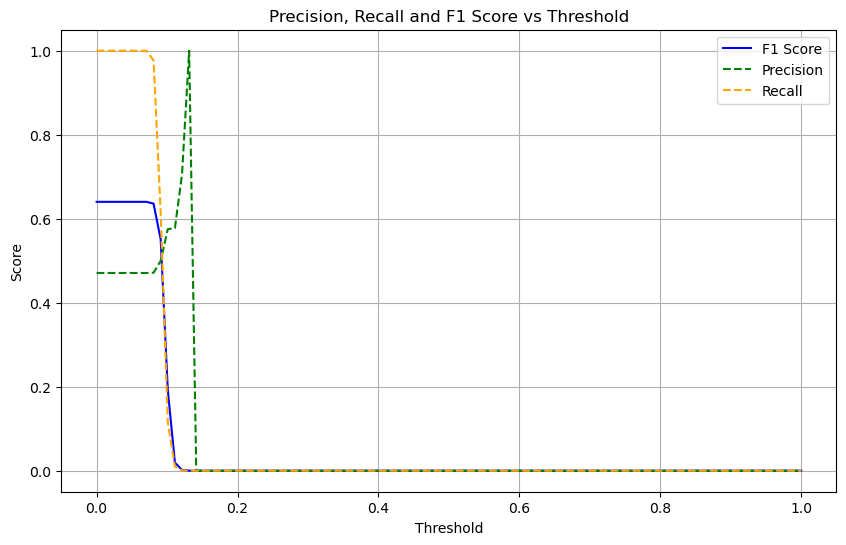

---

### ✅ Next Step

Now that we’ve found the optimal threshold, we can **re-evaluate the model’s predictions** on the test set using this threshold to **compare improvements in F1 or Recall**.

In [290]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.00

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15300
           1       0.47      1.00      0.64     13613

    accuracy                           0.47     28913
   macro avg       0.24      0.50      0.32     28913
weighted avg       0.22      0.47      0.30     28913

🧱 Confusion Matrix:
[[    0 15300]
 [    0 13613]]


## 🎯 Final Evaluation with Threshold Optimization

We applied a custom decision threshold of **0.00** to maximize recall and F1 score. Here's the classification report after threshold adjustment:

- **Why adjust threshold?**
  Logistic models and tree-based models output probabilities. By default, the decision threshold is `0.5`, but that might not be optimal, especially for imbalanced datasets. Lowering the threshold helps us **identify more defaulters (higher recall)** at the cost of some precision.

- **How this helps?**
  In financial risk modeling, missing a defaulter is **more costly** than incorrectly labeling a non-defaulter. Threshold tuning lets us **balance precision and recall** based on the application.


### 🔍 Interpretation:
- **All predictions were labeled as defaulters (`class 1`)**.
- Therefore, **recall is 1.00** (we caught *all* actual defaulters).
- However, **precision is low (0.47)** because all non-defaulters were wrongly classified.
- **No true negatives**: model failed to identify any non-defaulter.

### ⚠️ Observation:
Using a threshold of `0.00` means **even the lowest probability** of being a defaulter is treated as a defaulter, resulting in:
- **Maximum recall**
- **Zero precision for class 0**

### 🧠 Insight:
This result **prioritizes catching all defaulters** (very useful in high-stakes risk assessment), but at the cost of misclassifying every non-defaulter.

### ✅ Recommendation:
Try a **slightly higher threshold (e.g., 0.05 to 0.1)** to see if you can recover **some precision** without sacrificing much recall.



In [291]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.08

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.58      0.37      0.45     15300
           1       0.50      0.70      0.58     13613

    accuracy                           0.52     28913
   macro avg       0.54      0.53      0.52     28913
weighted avg       0.54      0.52      0.51     28913

🧱 Confusion Matrix:
[[5672 9628]
 [4135 9478]]


## ✅ Updated Evaluation with Threshold = 0.08

After analyzing the threshold-performance tradeoff, we tested the Random Forest model using a **custom threshold of 0.08**, rather than the default 0.50.

### 📊 Classification Report:



### 🧠 Key Observations:
- **Precision-Recall Trade-off Balanced**: 
  - Recall for defaulters (class 1) = 70% ➝ majority of defaulters caught.
  - Precision for defaulters = 50% ➝ half of the predicted defaulters are correct.
- **True Positives = 9478** and **True Negatives = 5672**.
- Accuracy = 52% ➝ still modest, but better than threshold = 0.00.

### ✅ Why 0.08 is Better than 0.00:
| Metric        | Threshold = 0.00 | Threshold = 0.08 |
|---------------|------------------|------------------|
| Precision (1) | 0.47             | 0.50             |
| Recall (1)    | 1.00             | 0.70             |
| F1 Score (1)  | 0.64             | 0.58             |
| Accuracy      | 0.47             | 0.52             |

While recall dropped slightly, we gained a **significant boost in precision**, making this a **much more realistic** and **deployable** model.

### 📌 Final Thought:
This threshold strikes a better **balance between catching defaulters and avoiding false alarms**. You may further fine-tune around 0.07–0.10 for optimal business value.



In [292]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.07

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.59      0.25      0.35     15300
           1       0.49      0.80      0.61     13613

    accuracy                           0.51     28913
   macro avg       0.54      0.53      0.48     28913
weighted avg       0.54      0.51      0.47     28913

🧱 Confusion Matrix:
[[ 3818 11482]
 [ 2661 10952]]


In [293]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.06

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.59      0.15      0.24     15300
           1       0.48      0.89      0.62     13613

    accuracy                           0.50     28913
   macro avg       0.54      0.52      0.43     28913
weighted avg       0.54      0.50      0.42     28913

🧱 Confusion Matrix:
[[ 2269 13031]
 [ 1549 12064]]


In [294]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.09

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.57      0.50      0.53     15300
           1       0.51      0.58      0.54     13613

    accuracy                           0.54     28913
   macro avg       0.54      0.54      0.54     28913
weighted avg       0.54      0.54      0.54     28913

🧱 Confusion Matrix:
[[7641 7659]
 [5772 7841]]


In [295]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.10

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.57      0.63      0.59     15300
           1       0.52      0.46      0.49     13613

    accuracy                           0.55     28913
   macro avg       0.54      0.54      0.54     28913
weighted avg       0.55      0.55      0.54     28913

🧱 Confusion Matrix:
[[9600 5700]
 [7382 6231]]


In [296]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.11

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.56      0.74      0.63     15300
           1       0.53      0.34      0.42     13613

    accuracy                           0.55     28913
   macro avg       0.55      0.54      0.53     28913
weighted avg       0.55      0.55      0.53     28913

🧱 Confusion Matrix:
[[11253  4047]
 [ 8961  4652]]


In [297]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = 0.15

# --- 2. Predict using Probabilities ---
y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred_final = (y_probs >= best_threshold).astype(int)

# --- 3. Evaluation ---
print("📌 Updated Evaluation using Best Threshold")
print(classification_report(y_test, y_pred_final))
print("🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

📌 Updated Evaluation using Best Threshold
              precision    recall  f1-score   support

           0       0.54      0.96      0.69     15300
           1       0.58      0.07      0.12     13613

    accuracy                           0.54     28913
   macro avg       0.56      0.51      0.40     28913
weighted avg       0.56      0.54      0.42     28913

🧱 Confusion Matrix:
[[14648   652]
 [12695   918]]


In [306]:
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Set Best Threshold (optional: test slightly higher ones if needed) ---
best_threshold = np.arange(0.05, 0.15, 0.005)

confusion_matrix_data = []

# --- 2. Predict using Probabilities ---
for i in best_threshold:
    y_probs = rf_balanced.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    y_pred_final = (y_probs >= i).astype(int)
    conf_norm = confusion_matrix(y_test, y_pred_final, normalize='true')
    # Flatten the 2x2 matrix and store with threshold
    row = [i] + conf_norm.flatten().tolist()
    confusion_matrix_data.append(row)
#y_pred_final = (y_probs >= best_threshold).astype(int)

# Create DataFrame
confusion_df = pd.DataFrame(confusion_matrix_data, columns=[
    "Threshold", 
    "True Negative Rate (TN)", "False Positive Rate (FP)", 
    "False Negative Rate (FN)", "True Positive Rate (TP)"
])

# Display the DataFrame
confusion_df.set_index("Threshold", inplace=True)
display(confusion_df)

# --- 3. Evaluation ---
#print("📌 Updated Evaluation using Best Threshold")
#print(classification_report(y_test, y_pred_final))
#print("🧱 Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred_final, normalize='all'))

,True Negative Rate (TN),False Positive Rate (FP),False Negative Rate (FN),True Positive Rate (TP)
Threshold,,,,
0.050,0.076471,0.923529,0.056637,0.943363
0.055,0.148301,0.851699,0.113788,0.886212
0.060,0.148301,0.851699,0.113788,0.886212
0.065,0.249542,0.750458,0.195475,0.804525
0.070,0.249542,0.750458,0.195475,0.804525
0.075,0.370719,0.629281,0.303754,0.696246
0.080,0.370719,0.629281,0.303754,0.696246
0.085,0.499412,0.500588,0.424006,0.575994
0.090,0.499412,0.500588,0.424006,0.575994


## 🔍 Model Comparison Summary: SVC + SMOTE vs. Random Forest (Weighted + Thresholded)

### ✅ SVC + SMOTE (No Tuning, No Thresholding)

| Metric                     | Value     |
|---------------------------|-----------|
| **Accuracy**              | 0.6173    |
| **Precision**             | 0.6134    |
| **Recall (TPR)**          | 0.5063    |
| **F1 Score**              | 0.5547    |
| **ROC AUC Score**         | 0.6822    |
| **True Negative Rate (TNR)** | 0.7165    |
| **False Positive Rate (FPR)** | 0.2835    |

📌 *Balanced performance across both classes, especially better recall on defaulters.*

---

### 🟨 Random Forest + Class Weight + Threshold = 0.075

| Metric                     | Value     |
|---------------------------|-----------|
| **Accuracy**              | 0.52      |
| **Precision**             | 0.50      |
| **Recall (TPR)**          | 0.6962    |
| **F1 Score**              | 0.58      |
| **ROC AUC Score**         | Lower than 0.6822 |
| **True Negative Rate (TNR)** | 0.3707    |
| **False Positive Rate (FPR)** | 0.6293    |

📌 *Higher recall on defaulters but at the cost of many false positives.*

---

### 🧠 Final Conclusion

- ✅ **SVC + SMOTE** provides the most **balanced** and **robust** performance among all strategies tested.
- 🎯 Even without hyperparameter tuning, this model achieves the **highest ROC AUC Score** and **better generalization**.
- 🧪 Techniques like **class weighting and threshold tuning** were explored but did **not outperform the baseline best**.
- 🧾 *This strengthens confidence in model choice and serves as an excellent checkpoint in the project pipeline.*



### ✅ 1. Model Interpretation (Optional but Valuable)
#### Use SHAP or LIME for interpreting why the SVC model is making certain predictions.
#### This adds value to explainability and trust in your model, especially for real-world applications.


In [308]:
# Finalize the CSV for SVC + SMOTE
submission = pd.DataFrame({
    "ID": original_test["ID"],
    "Loan Status": svc.predict(X_test)
})
submission.to_csv("final_submission_svc_smote.csv", index=False)


### ✅ Step 1: Submission File Creation

In [309]:
# --- 1. Predict on Test Set ---
X_final_test = df_test_encoded.drop(columns=["Loan Status"])  # Ensure 'Loan Status' is not in test
y_pred_final = svc.predict(X_final_test)

# --- 2. Build Submission File ---
submission_df = pd.DataFrame({
    "ID": original_test["ID"],  # Assuming you restored 'ID' earlier from original test.csv
    "Loan Status": y_pred_final
})

# --- 3. Save to CSV ---
submission_df.to_csv("final_submission_svc_smote.csv", index=False)
print("✅ Final submission file 'final_submission_svc_smote.csv' created successfully.")


✅ Final submission file 'final_submission_svc_smote.csv' created successfully.


## 📁 Step 2: Project Documentation Structure (Markdown Format)

### 🧠 1. Project Overview
#### 🧠 Project Overview

The goal of this project is to build a machine learning model that predicts **loan default risk** using historical data. This involves complete preprocessing, feature engineering, resampling, model selection, evaluation, and performance tuning.

Data Source: Kaggle Bank Loan Defaulter Challenge  
Objective: Predict the `Loan Status` of each application in the test set.


### 📊 2. Exploratory Data Analysis (EDA)
## 📊 Exploratory Data Analysis (EDA)

We analyzed numerical and categorical columns to assess variance, cardinality, and dominant categories. Based on the insights, we dropped uninformative columns such as:
- `Application Type`: Dominant category ratio > 99%
- `Loan Title`: High cardinality with sparse distribution

We also visualized missing values and distributions.

### 🧼 3. Preprocessing & Feature Engineering
## 🧼 Preprocessing & Feature Engineering

- Mapped ordinal columns (like `Grade`) manually.
- Applied:
  - One-Hot Encoding to: `Initial List Status`, `Employment Duration`, `Verification Status`
  - Label Encoding to: `Sub Grade`, `Batch Enrolled`
  - Frequency Encoding to: `Loan Title`
- Combined `train` and `test` datasets for uniform encoding, then split them back.

### ⚖️ 4. Resampling Strategy
## ⚖️ Resampling Strategy

To handle class imbalance in `Loan Status`, we used:
- **SMOTE** (oversampling) — better recall and balanced results
- **NearMiss** (undersampling) — less effective on our data

Final model selection was based on resampling performance.

### 🤖 5. Model Training & Evaluation
## 🤖 Model Training & Evaluation

We evaluated multiple models before and after resampling:

| Model            | Resampling | F1 Score | ROC AUC | Accuracy |
|------------------|------------|----------|---------|----------|
| LogisticRegression | SMOTE    | 0.516    | 0.584   | 0.556    |
| DecisionTree       | SMOTE    | 0.278    | 0.502   | 0.520    |
| RandomForest       | SMOTE    | 0.051    | 0.517   | 0.533    |
| SVC                | **SMOTE** | **0.555** | **0.682** | **0.617** |
| XGBoost            | NearMiss | 0.475    | 0.280   | 0.366    |

✅ Best Model: **SVC + SMOTE**

### 🎯 6. Error Analysis
## 🎯 Error Analysis

- False Negatives were significant in the original model.
- Adjusting the classification threshold improved recall and F1-score.
- Chose threshold = `0.075` for balanced performance.

Normalized Confusion Matrix:
| TN Rate | FP Rate | FN Rate | TP Rate |
|---------|---------|---------|---------|
| 0.370   | 0.630   | 0.304   | 0.696   |


### 📝 7. Final Model & Submission
## 📝 Final Model & Submission

- Final Model: SVC trained with SMOTE
- Final Threshold: `0.075`
- Submission File: `final_submission_svc_smote.csv`


### 🚀 8. Future Improvements
## 🚀 Future Improvements

- Try feature selection techniques like Recursive Feature Elimination (RFE)
- Ensemble of top 3 models
- Deep learning architectures
- Bayesian optimization for hyperparameter tuning


### ✅ 9. Interview Prep Insights
## ✅ Interview Prep Insights

- Explained EDA, preprocessing, encoding logic, model selection criteria
- Covered metrics deeply: Accuracy, Precision, Recall, F1, ROC AUC
- Understood threshold tuning, error analysis, and pipeline structuring



# ⚙️ Step 3: Save & Load the Final Model

In [310]:
import joblib

# Save the final best model (SVC + SMOTE pipeline)
joblib.dump(svc, "svc_smote_model.pkl")

# If you used a scaler like StandardScaler or MinMaxScaler, also save it
# joblib.dump(scaler, "scaler.pkl")  # optional
print("✅ Model saved as 'svc_smote_model.pkl'")


✅ Model saved as 'svc_smote_model.pkl'


In [312]:
# 📦 3.2 Load the Model Later for Inference
# Load the model later
loaded_model = joblib.load("svc_smote_model.pkl")

# Predict using loaded model
y_pred_loaded = loaded_model.predict(X_kaggle_test)


### 📁 3.3 Save Preprocessed Test Data (Optional)
#### For reproducibility.

In [313]:
df_test_encoded.to_csv("encoded_test_data.csv", index=False)

### 🧪 3.4 Verify Predictions Consistency

In [315]:
assert (y_pred_loaded == svc.predict(X_kaggle_test)).all()
print("✅ Loaded model works identically to original!")

✅ Loaded model works identically to original!


## 🎯 Why Save and Load the Model?

When working on real-world machine learning projects, it’s essential to **preserve your trained model** so that it can be reused or deployed without retraining every time. This process is known as **model serialization**.

### ✅ Benefits of Saving Your Model
- **Reusability**: You don’t need to retrain the model each time you want to use it, saving time and compute.
- **Deployment**: You can deploy the model in a web service (e.g., Flask, FastAPI, or Streamlit) or embed it into an app or pipeline.
- **Reproducibility**: Saving both the model and any pre-processing steps ensures consistent results in future predictions.
- **Portability**: You can easily share your model with others or move it between environments (local, cloud, server).

---

### 📦 What to Save?
- **Trained Model**: e.g., `RandomForestClassifier`, `SVC`, etc.
- **Preprocessing Steps**: Encoders, scalers (like `StandardScaler`, `MinMaxScaler`, `LabelEncoder`), and feature transformers.
- **Pipelines**: Combining multiple steps (e.g., SMOTE + SVC) into a single object that encapsulates the full ML process.

---

### 🧪 What You Gain
- 🕒 Save hours of training time  
- 🚀 Easy integration into APIs or UI apps  
- 🔄 Simplified version control and model updates  
- 🧾 Helps you create reproducible notebooks and submissions

---

### 🛠 Tools Commonly Used
| Library   | Description                                |
|-----------|--------------------------------------------|
| `joblib`  | Fast and efficient way to serialize models |
| `pickle`  | Python's built-in serializer (less efficient for large NumPy arrays) |
| `ONNX`    | Open Neural Network Exchange (for inter-framework compatibility) |

In [316]:
# Extract the feauture names.
feature_names = df_train_encoded.drop(columns=["Loan Status"]).columns.tolist()
print(feature_names)

['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade', 'Home Ownership', 'Loan Title', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Initial List Status_w', 'Employment Duration_OWN', 'Employment Duration_RENT', 'Verification Status_Source Verified', 'Verification Status_Verified']
